# Brief Introduction to the Problem:
Baseball, often referred to as America’s pastime, is the quintessential American sport, with a rich history and tradition of uniting communities. 

Baseball is also regarded as one of, if not the most, analytics driven sport. Because of the nature of the sport as having discrete events, baseball is a very analytic rich sport. From exact metrics about play outcomes to distinct statistics about location and velocities of pitches, each play in baseball provides a wide range of information. Thus, utilizing all this information and creating in-depth analysis has been a key focus of the sport in order to help players improve and teams win more. This project will be focused on using a dataset with information gathered about college baseball over the 2024 season, obtained by the UT Baseball team.

## Section about UT Baseball and NCAA Division 1
Founded in 1894 at The University of Texas Austin, the Texas Longhorns Baseball team is the “winningest” NCAA Division I intercollegiate men’s baseball program of all time. The team has an all-time win–loss record of 3774–1442–32 (.722) as of the end of the 2024 season, and the Longhorns have won 6 NCAA baseball national championships.
The NCAA Division I baseball tournament is a 64-team tournament that starts in February and ends in June each year. 
Regionals: In the first round, the 64 teams are split into 16 brackets. Each is a double-elimination bracket (team isn't eliminated until they lose two games) with 4 teams.

Super regionals: The 16 winners of the regionals move on to the super regionals and are split into 8 pairings.
Men's College World Series: The 8 winners of the super regionals head to the Men's College World Series (MCWS). They are split into two double-elimination brackets, consisting of 4 teams each.
Men's College World Series Finals: In the MCWS Finals, the NCAA champion is decided between the winners of the 2 MCWS brackets.

College baseball is about much more than sports. It is a chance to develop the next generation of baseball talent, and an integral part of the economic and cultural fabric of a university and a city or state. It is an opportunity for players to develop their skills to advance to the professional level, gain scholarships to higher education, and experience the sense of camaraderie from playing a team sport. College baseball games attract millions of viewers, although interest in baseball is not the same as it has been in the past, as college basketball and football takes a front seat in the college sports scene. The future of baseball is in a precarious, uncertain position and baseball teams around the country are working together to sustain their baseball teams and the relevance of baseball in American society.


## What is the machine learning problem you are trying to solve? Why does the problem matter? 
The machine learning problem we are trying to solve is the Multiclass Classification problem of deciding the kind of pitch a pitcher should throw to get their desired play result.

The start of a play in baseball, can be an opportunity or a missed chance for that team. The start can define the final outcome of the play, and even the game. Pitchers must make a split second decision on how they want to pitch their ball to get the desired outcome and help their team win in the long run, factoring in many different aspects of their game into that decision. 

The problem of how to throw a pitch to get a desired result is one that affects all baseball players, and pitchers especially. We would like to help pitchers in their decision making process. This can help amateur pitchers become better, and can be used by professional pitchers to ensure their pitch will result in their desired outcome and ultimately win for their team.


## What could the results of your predictive model be used for? 
The results of our predictive model can be used to help pitchers figure out what type of pitches they need to throw to obtain a certain outcome from this at-bat, assuming the batter swings at the pitch. This can help coaches and pitchers make decisions on what kind of pitch to throw in crucial situations of the game, and develop a very robust pitch selection strategy for games. If certain pitchers on a team are better at certain types of pitches than others, the coaches can use that knowledge to choose who to pitch based on which pitch type is needed. Also, if there is a certain match-up between a same-handedness batter, then coaches can adjust their pitch recommendation. 


## Why would we want to be able to predict the thing you’re trying to predict? 
We want to be able to predict the Play Result because we think that will help pitchers determine what type of outcome they will get from a batter swinging at this particular pitch. For pitchers, predicting Play Result based on the type of pitch they throw can give them insight into which of their pitches results in a positive outcome versus a negative outcome, and this can then help them in future games to know what type of pitch they should aim to throw. For example, it is useful for pitchers to know which pitches result in outs versus scoring plays like a home run.


## Dataset Description
The dataset describes baseball statistics from the UT baseball team over the time period of the 2024 baseball season, from January to April. It provides information on 4904 unique games, each with their own unique game_id. The dataset has information about the situation of a pitch, pitch data, hitter data, and pitcher, batter, and catcher names.


In [1]:
import pandas as pd
df = pd.read_csv("2024_combined_data (1).csv")

In [2]:
df.head()

,game_id,Date,Time,PitchNo,Inning,inning_half,PAofInning,PitchofPA,Pitcher,PitcherId,...,z0,vx0,vy0,vz0,ax0,ay0,az0,catcher,catcher_id,catcher_team
0,20240220-HighPointUniversity-1,2024-02-20,60314.0,82,3,Top,4,2,"Olsovsky, Dalton",1000251274,...,5.41,3.28,-106.58,0.58,12.91,22.07,-34.04,"Ruiz, Justin",1.000209e+09,HIG_PAN
1,20240220-HighPointUniversity-1,2024-02-20,63576.0,185,6,Top,2,3,"Glover, Lucas",1000138461,...,6.01,5.23,-118.11,-3.37,3.74,26.71,-27.88,"Ruiz, Justin",1.000209e+09,HIG_PAN
2,20240220-HighPointUniversity-1,2024-02-20,66446.0,269,8,Top,3,1,"Carter, Noah",1000108939,...,5.52,3.08,-122.94,-1.77,-3.68,24.28,-16.89,"Grintz, Eric",6.864560e+05,HIG_PAN
3,20240220-HighPointUniversity-1,2024-02-20,64809.0,216,6,Bottom,6,1,"Welch, Collin",1000192105,...,6.23,0.38,-117.74,-0.37,-12.27,24.59,-28.63,"Church, Braxton",1.000192e+09,APP_MOU
4,20240220-HighPointUniversity-1,2024-02-20,67985.0,308,9,Bottom,4,3,"Lewis, Zach",1000127413,...,5.18,9.62,-132.57,-10.20,-8.59,32.05,-14.93,"Church, Braxton",1.000192e+09,APP_MOU


In [3]:
print(df.shape)

(1513439, 77)


In [4]:
df.columns

Index(['game_id', 'Date', 'Time', 'PitchNo', 'Inning', 'inning_half',
       'PAofInning', 'PitchofPA', 'Pitcher', 'PitcherId', 'PitcherThrows',
       'PitcherTeam', 'Batter', 'BatterId', 'BatterSide', 'BatterTeam',
       'PitchCall', 'PlayResult', 'KorBB', 'OutsOnPlay', 'RunsScored', 'Balls',
       'Strikes', 'Outs', 'TaggedPitchType', 'RelSpeed', 'SpinRate',
       'SpinAxis', 'Tilt', 'InducedVertBreak', 'VertBreak', 'HorzBreak',
       'VertApprAngle', 'HorzApprAngle', 'vert_rel_angle', 'horz_rel_angle',
       'RelHeight', 'RelSide', 'Extension', 'PlateLocHeight', 'PlateLocSide',
       'zone_time', 'EffectiveVelo', 'SpeedDrop', 'TaggedHitType', 'hit_x',
       'hit_y', 'ExitSpeed', 'Angle', 'HitSpinRate', 'hit_spin_axis',
       'Distance', 'hit_last_tracked_distance', 'hit_hang_time', 'Direction',
       'Bearing', 'hit_max_height', 'hit_contact_x', 'hit_contact_y',
       'hit_contact_z', 'position_110x', 'position_110y', 'position_110z',
       'pfxx', 'pfxz', 'x0', 'y0', 'z

# Data Cleaning
In this section, we will clean our data by removing the features we believe are irrelevant to our model.

In [5]:
df['PitcherThrows'].value_counts()
df['BatterSide'].value_counts()

# Pitcher Throws: R, L S

BatterSide
R            971742
L            541647
Undefined        50
Name: count, dtype: int64

Since our aim with this model is to predict the likely result of a thrown pitch, just based on information a pitcher would have control over in an at-bat scenario, we are dropping the columns related to how the pitch is hit, including Exit Speed and Angle, since this information is unknown to the pitcher at the time of making their decision. We are also dropping the columns for ids, including game and pitcher ids, so they are not factored into our model.

In [6]:
cols_to_drop = ['game_id', 'Date', 'Time', 'Batter', 'BatterId', 'BatterTeam', 'TaggedHitType', 'hit_x',
                'hit_y', 'ExitSpeed', 'Angle', 'HitSpinRate', 'hit_spin_axis',
                'Distance', 'hit_last_tracked_distance', 'hit_hang_time', 'Direction',
                'Bearing', 'hit_max_height', 'hit_contact_x', 'hit_contact_y',
                'hit_contact_z','PitcherTeam','Pitcher', 'PitcherId', 'KorBB',
                'catcher', 'catcher_id', 'catcher_team']

df = df.drop(cols_to_drop,axis=1)

In [7]:
df.head()

,PitchNo,Inning,inning_half,PAofInning,PitchofPA,PitcherThrows,BatterSide,PitchCall,PlayResult,OutsOnPlay,...,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0
0,82,3,Top,4,2,R,R,StrikeCalled,Undefined,0,...,-1.66,-2.00,50.0,5.41,3.28,-106.58,0.58,12.91,22.07,-34.04
1,185,6,Top,2,3,R,R,StrikeCalled,Strikeout,0,...,3.10,-1.87,50.0,6.01,5.23,-118.11,-3.37,3.74,26.71,-27.88
2,269,8,Top,3,1,R,R,HitByPitch,Undefined,0,...,9.98,-2.41,50.0,5.52,3.08,-122.94,-1.77,-3.68,24.28,-16.89
3,216,6,Bottom,6,1,R,L,BallCalled,Undefined,0,...,2.55,-1.17,50.0,6.23,0.38,-117.74,-0.37,-12.27,24.59,-28.63
4,308,9,Bottom,4,3,R,R,BallCalled,Undefined,0,...,9.83,-1.23,50.0,5.18,9.62,-132.57,-10.20,-8.59,32.05,-14.93


Cleaning up errors in how "SIngle" versus "Single" and "HomeRun" versus "homerun" are noted in the data collection

In [8]:
df['PlayResult'] = df['PlayResult'].str.title()

In [9]:
df['PlayResult'].value_counts()

PlayResult
Undefined         1128864
Out                146365
Strikeout           78363
Single              60297
Walk                44806
Double              17877
Homerun             11521
Sacrifice            7748
Fielderschoice       6756
Error                6377
Stolenbase           1980
Triple               1883
Caughtstealing        602
Name: count, dtype: int64

Our model aims to predict the play result for a hit pitch, and we are not including errors. Thus, we limited the play results to "Out", "Single", "Double", "Triple", "Homerun"

In [10]:
df = df[df['PlayResult'].isin(['Out', 'Single', 'Double', 'Triple', 'Homerun'])]

In [11]:
df['PlayResult'].value_counts()

PlayResult
Out        146365
Single      60297
Double      17877
Homerun     11521
Triple       1883
Name: count, dtype: int64

In [12]:
df.describe()

,PitchNo,Inning,PAofInning,PitchofPA,OutsOnPlay,RunsScored,Balls,Strikes,Outs,RelSpeed,...,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0
count,237943.000000,237943.000000,237943.000000,237943.000000,237943.000000,237943.000000,237943.000000,237943.000000,237943.000000,236633.000000,...,236633.000000,236633.000000,236633.0,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000
mean,155.472458,4.784797,3.130846,3.285909,0.648908,0.221419,1.086718,1.036958,0.975355,85.173191,...,5.410697,-0.698182,50.0,5.593194,2.341157,-123.517539,-3.020850,-3.101841,25.955383,-23.195081
std,93.301664,2.525452,1.965054,1.794471,0.532081,0.572583,1.011131,0.818237,0.821488,5.760423,...,4.727797,1.563894,0.0,0.498850,5.104889,8.339524,2.740909,10.427141,4.112026,7.675004
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.430000,...,-25.180000,-8.460000,50.0,0.640000,-17.360000,-148.250000,-13.880000,-35.560000,4.470000,-74.600000
25%,78.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.910000,...,2.110000,-1.750000,50.0,5.330000,-1.130000,-130.020000,-4.950000,-12.030000,22.960000,-29.200000
50%,150.000000,5.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,86.190000,...,6.140000,-1.210000,50.0,5.630000,3.830000,-124.980000,-3.150000,-4.670000,26.010000,-22.480000
75%,228.000000,7.000000,4.000000,5.000000,1.000000,0.000000,2.000000,2.000000,2.000000,89.670000,...,9.200000,0.520000,50.0,5.910000,5.960000,-117.370000,-1.200000,5.530000,28.910000,-16.840000
max,538.000000,17.000000,21.000000,17.000000,3.000000,4.000000,4.000000,3.000000,2.000000,102.080000,...,31.680000,7.370000,50.0,8.920000,17.260000,-60.190000,26.400000,30.950000,48.790000,24.080000


In [13]:
df.columns

Index(['PitchNo', 'Inning', 'inning_half', 'PAofInning', 'PitchofPA',
       'PitcherThrows', 'BatterSide', 'PitchCall', 'PlayResult', 'OutsOnPlay',
       'RunsScored', 'Balls', 'Strikes', 'Outs', 'TaggedPitchType', 'RelSpeed',
       'SpinRate', 'SpinAxis', 'Tilt', 'InducedVertBreak', 'VertBreak',
       'HorzBreak', 'VertApprAngle', 'HorzApprAngle', 'vert_rel_angle',
       'horz_rel_angle', 'RelHeight', 'RelSide', 'Extension', 'PlateLocHeight',
       'PlateLocSide', 'zone_time', 'EffectiveVelo', 'SpeedDrop',
       'position_110x', 'position_110y', 'position_110z', 'pfxx', 'pfxz', 'x0',
       'y0', 'z0', 'vx0', 'vy0', 'vz0', 'ax0', 'ay0', 'az0'],
      dtype='object')

In [14]:
df.iloc[:,:10].describe(include="all")

,PitchNo,Inning,inning_half,PAofInning,PitchofPA,PitcherThrows,BatterSide,PitchCall,PlayResult,OutsOnPlay
count,237943.000000,237943.000000,237943,237943.000000,237943.000000,237943,237943,237943,237943,237943.000000
unique,NaN,NaN,2,NaN,NaN,3,3,5,5,NaN
top,NaN,NaN,Bottom,NaN,NaN,R,R,InPlay,Out,NaN
freq,NaN,NaN,120330,NaN,NaN,176000,153568,237938,146365,NaN
mean,155.472458,4.784797,NaN,3.130846,3.285909,NaN,NaN,NaN,NaN,0.648908
std,93.301664,2.525452,NaN,1.965054,1.794471,NaN,NaN,NaN,NaN,0.532081
min,1.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,78.000000,3.000000,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,0.000000
50%,150.000000,5.000000,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,1.000000
75%,228.000000,7.000000,NaN,4.000000,5.000000,NaN,NaN,NaN,NaN,1.000000


In [15]:
df.iloc[:,10:20].describe(include="all")

,RunsScored,Balls,Strikes,Outs,TaggedPitchType,RelSpeed,SpinRate,SpinAxis,Tilt,InducedVertBreak
count,237943.000000,237943.000000,237943.000000,237943.000000,237383,236633.000000,236621.000000,235037.000000,235037.000000,235037.000000
unique,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Fastball,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,112191,NaN,NaN,NaN,NaN,NaN
mean,0.221419,1.086718,1.036958,0.975355,NaN,85.173191,2160.798928,182.151698,22862.053209,9.314316
std,0.572583,1.011131,0.818237,0.821488,NaN,5.760423,296.475393,70.088924,15707.317900,8.564277
min,0.000000,0.000000,0.000000,0.000000,NaN,45.430000,615.800000,0.030000,3600.000000,-46.300000
25%,0.000000,0.000000,0.000000,0.000000,NaN,80.910000,2014.180000,129.480000,6300.000000,3.420000
50%,0.000000,1.000000,1.000000,1.000000,NaN,86.190000,2183.340000,203.290000,26100.000000,10.700000
75%,0.000000,2.000000,2.000000,2.000000,NaN,89.670000,2340.680000,231.860000,37800.000000,16.180000


In [16]:
df.iloc[:,20:30].describe(include="all")

,VertBreak,HorzBreak,VertApprAngle,HorzApprAngle,vert_rel_angle,horz_rel_angle,RelHeight,RelSide,Extension,PlateLocHeight
count,235037.000000,235037.000000,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000,236555.000000,236633.000000
mean,-30.219308,2.730778,-6.478636,-0.617926,-0.879045,-1.111111,5.681059,0.786320,5.775338,-0.017900
std,13.352875,11.952718,1.442519,1.784944,1.445757,2.492375,0.558147,1.747224,0.577031,0.575115
min,-107.940000,-32.450000,-15.730000,-8.160000,-6.350000,-8.160000,-0.850000,-6.810000,-3.380000,-13.220000
25%,-39.600000,-7.760000,-7.400000,-1.730000,-1.910000,-2.900000,5.390000,-0.630000,5.390000,-0.410000
50%,-26.880000,5.200000,-6.250000,-0.570000,-1.040000,-1.850000,5.720000,1.370000,5.780000,-0.020000
75%,-19.390000,13.030000,-5.420000,0.430000,0.030000,0.570000,6.030000,1.960000,6.160000,0.380000
max,21.230000,30.020000,11.740000,8.300000,23.870000,7.870000,9.010000,8.150000,11.730000,9.430000


In [17]:
df.iloc[:,30:].describe(include="all")

,PlateLocSide,zone_time,EffectiveVelo,SpeedDrop,position_110x,position_110y,position_110z,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0
count,236633.000000,236633.000000,236633.000000,236633.000000,114988.000000,114988.000000,114988.000000,236633.000000,236633.000000,236633.000000,236633.0,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000,236633.000000
mean,2.347228,0.451443,83.964447,7.503356,102.949612,47.704054,-1.631737,-1.747698,5.410697,-0.698182,50.0,5.593194,2.341157,-123.517539,-3.020850,-3.101841,25.955383,-23.195081
std,0.594866,0.034108,6.005551,1.070020,7.342748,31.480258,38.010120,6.669099,4.727797,1.563894,0.0,0.498850,5.104889,8.339524,2.740909,10.427141,4.112026,7.675004
min,-5.160000,0.370000,35.930000,1.970000,-109.020000,2.420000,-101.570000,-25.740000,-25.180000,-8.460000,50.0,0.640000,-17.360000,-148.250000,-13.880000,-35.560000,4.470000,-74.600000
25%,1.950000,0.420000,79.510000,6.760000,98.750000,22.610000,-32.800000,-7.470000,2.110000,-1.750000,50.0,5.330000,-1.130000,-130.020000,-4.950000,-12.030000,22.960000,-29.200000
50%,2.350000,0.440000,85.010000,7.520000,105.550000,41.670000,-2.310000,-3.020000,6.140000,-1.210000,50.0,5.630000,3.830000,-124.980000,-3.150000,-4.670000,26.010000,-22.480000
75%,2.740000,0.470000,88.640000,8.240000,108.940000,66.200000,29.030000,3.970000,9.200000,0.520000,50.0,5.910000,5.960000,-117.370000,-1.200000,5.530000,28.910000,-16.840000
max,19.430000,1.050000,101.920000,13.970000,110.000000,207.730000,103.510000,20.820000,31.680000,7.370000,50.0,8.920000,17.260000,-60.190000,26.400000,30.950000,48.790000,24.080000


## Initial Data Exploration
Looking at general relationships between some numeric features to see if there are any interesting relationships

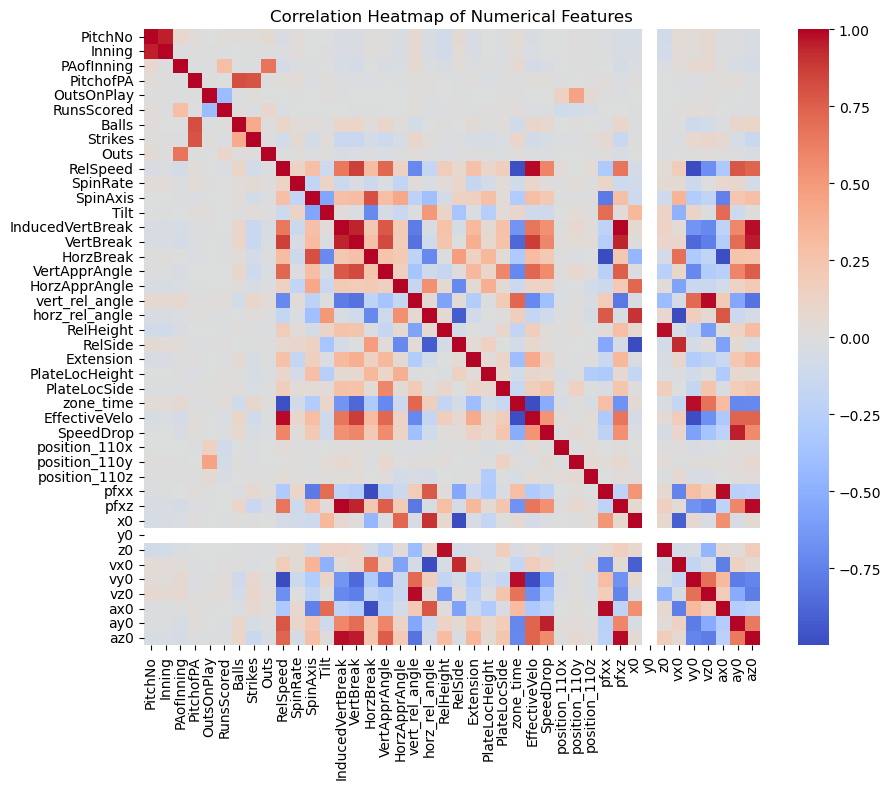

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Pitch No and Inning are highly correlated. this makes sense, later pitches happen in later innings as the game continues on

/Users/kerrynxu/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='PitchNo', ylabel='Inning'>

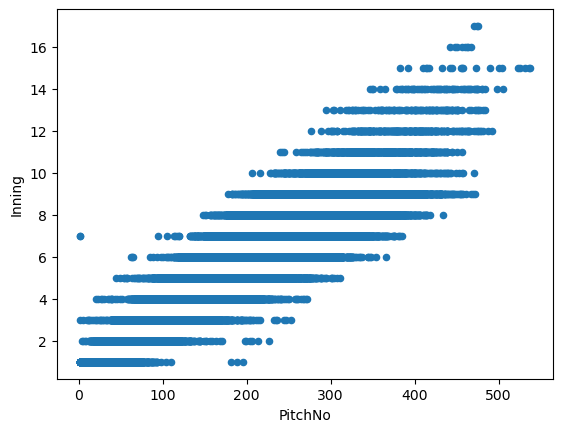

In [19]:
df.plot.scatter(x='PitchNo', y='Inning')

there is some correlation between vertbreak and pfxz. this relation makes sense, as vertbreak and pfxz are referring to changes along the y axis of the baseball

<Axes: xlabel='VertBreak', ylabel='pfxz'>

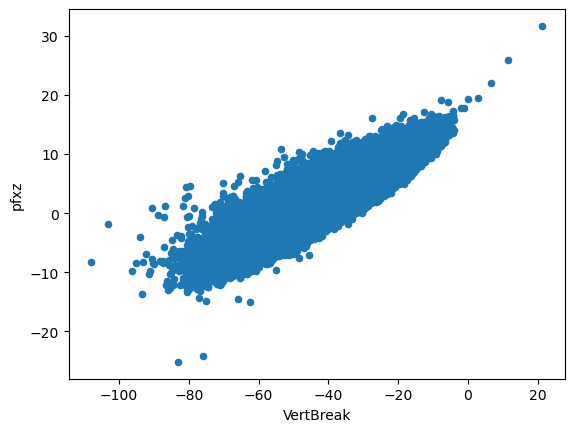

In [20]:
df.plot.scatter(x='VertBreak', y='pfxz')

<Axes: xlabel='InducedVertBreak', ylabel='pfxz'>

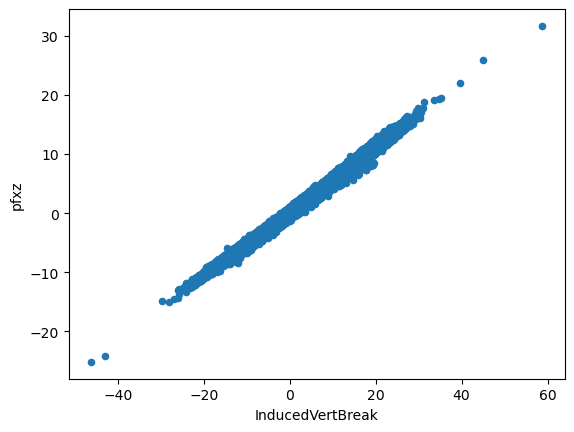

In [21]:
df.plot.scatter(x='InducedVertBreak', y='pfxz')


Similarly, there is some correlation between horzbreak and pfxx. this relation makes sense, as they are referring to changes along the x axis of the baseball

<Axes: xlabel='HorzBreak', ylabel='pfxx'>

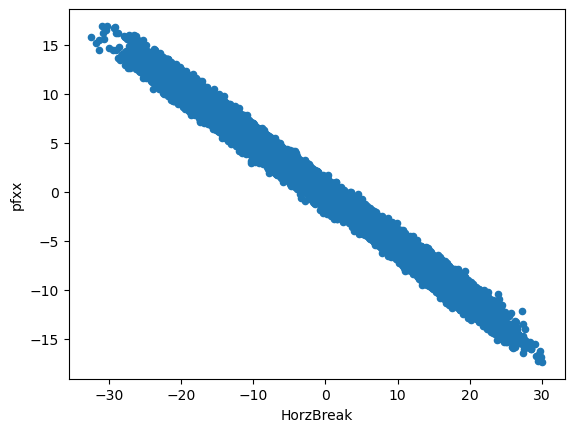

In [22]:
df.plot.scatter(x='HorzBreak', y='pfxx')


Plot of the relationship between Effective Velocity and Speed Drop. Originally thought that perhaps if a ball were traveling at a higher effective velocity, then there might be a lower or higher speed drop. 

An interesting cluster has formed in the data, not a linear one but there is some relationship between the two variables

<Axes: xlabel='SpeedDrop', ylabel='EffectiveVelo'>

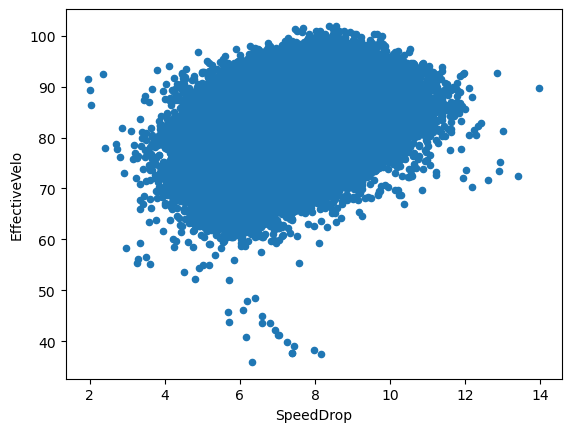

In [23]:
df.plot.scatter(x='SpeedDrop', y='EffectiveVelo')

Plot of the relationship between Spin Rate and Rel Speed. An interesting shaped cluster has formed in the data, some relationship exists between the two variables.

<Axes: xlabel='SpinRate', ylabel='RelSpeed'>

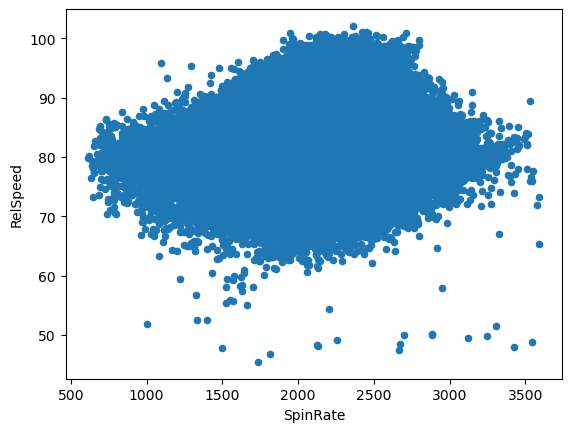

In [24]:
df.plot.scatter(x='SpinRate', y='RelSpeed')

Plot of Spin rate and tilt. They do do not seem to have any correlation with one another. Both values have large ranges.

<Axes: xlabel='SpinRate', ylabel='Tilt'>

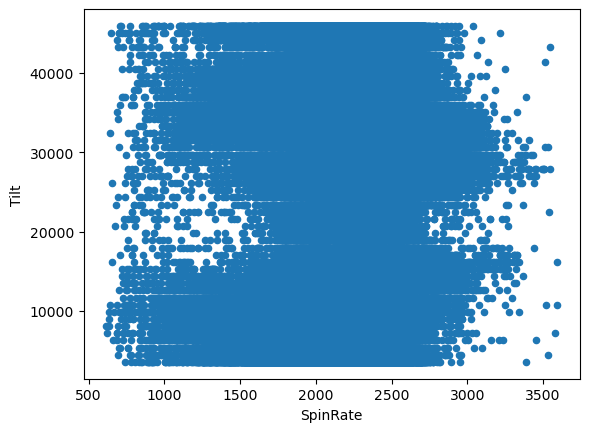

In [25]:
df.plot.scatter(x='SpinRate', y='Tilt')

Plot of Rel Speed and Tilt. It is interesting that higher tilts and lower tilts both see higher rel Speeds

<Axes: xlabel='RelSpeed', ylabel='Tilt'>

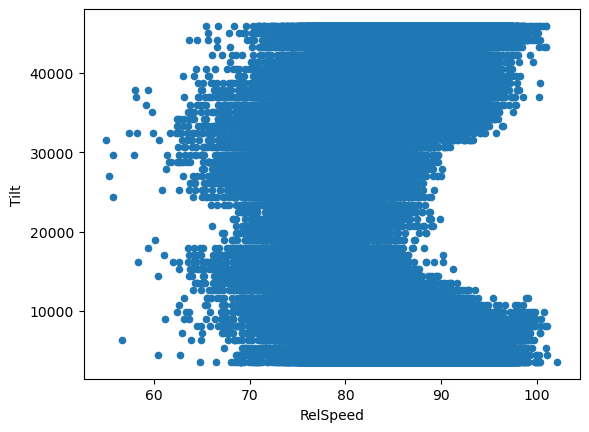

In [26]:
df.plot.scatter(x='RelSpeed', y='Tilt')


In [18]:
df["TaggedPitchType"].value_counts()

TaggedPitchType
Fastball            112191
Slider               47359
ChangeUp             26296
Sinker               14933
Curveball            13039
Cutter                7455
FourSeamFastBall      7210
Changeup              2743
Four-Seam             2660
TwoSeamFastBall       2251
Splitter              1194
Knuckleball             29
OneSeamFastBall         23
Name: count, dtype: int64

Cleaning errors in describing pitcher and batter's handedness in the dataset

In [19]:
df = df[df["PitcherThrows"] != "S"]
df = df[df["BatterSide"] != "Undefined"]

## Data Exploration
Exploring relationships and distributions of the position of the ball along the x, y, and z-axes when it has traveled 110 feet from home plate

<Axes: title={'center': 'position_110x'}, xlabel='PlayResult'>

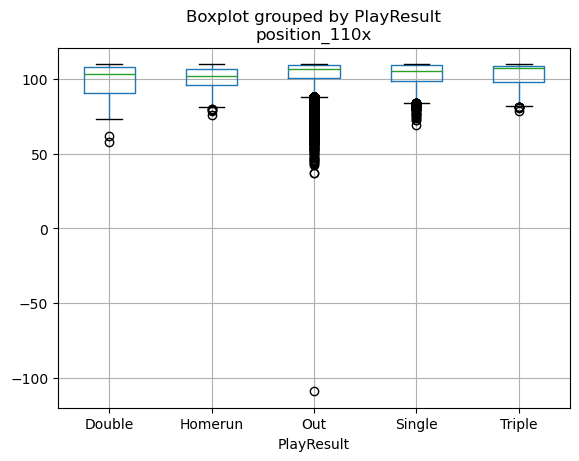

In [29]:
df.boxplot(column='position_110x', by='PlayResult')

<Axes: title={'center': 'position_110y'}, xlabel='PlayResult'>

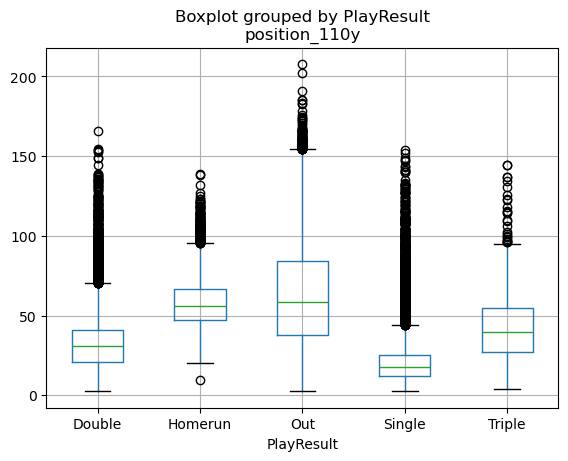

In [30]:
df.boxplot(column='position_110y', by='PlayResult')

<Axes: title={'center': 'position_110z'}, xlabel='PlayResult'>

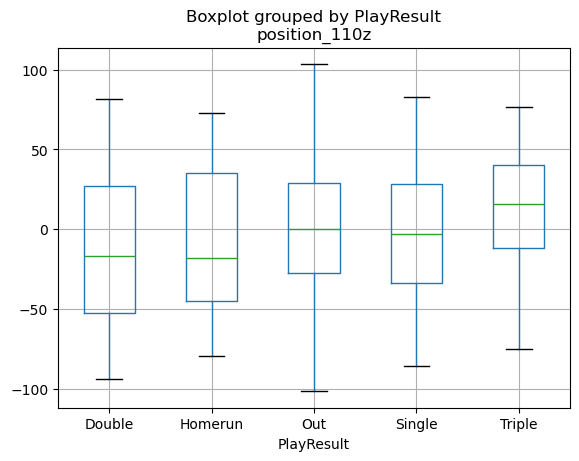

In [31]:
df.boxplot(column='position_110z', by='PlayResult')

#### Cleaning 'position_110x' column and doing similar case imputation for null values

In [20]:
# based on the box plots, there does not seem to be much of a correlation with position_110z and PlayResult
col_to_drop = ['position_110z']
df = df.drop(col_to_drop,axis=1)

In [21]:
# similar case imputation based on similar PlayResult
position_110x_median = df.groupby('PlayResult')['position_110x'].median()
df['position_110x'] = df['position_110x'].fillna(df['PlayResult'].map(position_110x_median))

position_110y_median = df.groupby('PlayResult')['position_110y'].median()
df['position_110y'] = df['position_110y'].fillna(df['PlayResult'].map(position_110y_median))
df.iloc[:,30:].describe(include="all")

,PlateLocSide,zone_time,EffectiveVelo,SpeedDrop,position_110x,position_110y,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0
count,236572.000000,236572.000000,236572.000000,236572.000000,237882.000000,237882.000000,236572.000000,236572.000000,236572.000000,236572.0,236572.000000,236572.000000,236572.000000,236572.000000,236572.000000,236572.000000,236572.000000
mean,2.347247,0.451451,83.962923,7.503295,104.560598,47.338845,-1.747286,5.410116,-0.698013,50.0,5.593169,2.340573,-123.515419,-3.020269,-3.101002,25.954782,-23.196371
std,0.594846,0.034106,6.005028,1.070020,5.355211,25.386445,6.669564,4.727922,1.563963,0.0,0.498851,5.105113,8.338772,2.740734,10.427646,4.111880,7.674767
min,-5.160000,0.370000,35.930000,1.970000,-109.020000,2.420000,-25.740000,-25.180000,-8.460000,50.0,0.640000,-17.360000,-148.250000,-13.880000,-35.560000,4.470000,-74.600000
25%,1.950000,0.420000,79.510000,6.760000,105.320000,21.620000,-7.470000,2.110000,-1.750000,50.0,5.330000,-1.140000,-130.020000,-4.950000,-12.030000,22.960000,-29.200000
50%,2.350000,0.440000,85.010000,7.520000,106.390000,58.315000,-3.020000,6.140000,-1.210000,50.0,5.630000,3.830000,-124.980000,-3.150000,-4.670000,26.010000,-22.490000
75%,2.740000,0.470000,88.640000,8.240000,106.390000,58.315000,3.980000,9.200000,0.530000,50.0,5.910000,5.960000,-117.370000,-1.200000,5.530000,28.910000,-16.850000
max,19.430000,1.050000,101.920000,13.970000,110.000000,207.730000,20.820000,31.680000,7.370000,50.0,8.920000,17.260000,-60.190000,26.400000,30.950000,48.790000,24.080000


#### Exploring null rows in dataset

In [22]:
df.isna().sum()

PitchNo                0
Inning                 0
inning_half            0
PAofInning             0
PitchofPA              0
PitcherThrows          0
BatterSide             0
PitchCall              0
PlayResult             0
OutsOnPlay             0
RunsScored             0
Balls                  0
Strikes                0
Outs                   0
TaggedPitchType      560
RelSpeed            1310
SpinRate            1322
SpinAxis            2906
Tilt                2906
InducedVertBreak    2906
VertBreak           2906
HorzBreak           2906
VertApprAngle       1310
HorzApprAngle       1310
vert_rel_angle      1310
horz_rel_angle      1310
RelHeight           1310
RelSide             1310
Extension           1388
PlateLocHeight      1310
PlateLocSide        1310
zone_time           1310
EffectiveVelo       1310
SpeedDrop           1310
position_110x          0
position_110y          0
pfxx                1310
pfxz                1310
x0                  1310
y0                  1310


Since our dataset is large enough (~300,000 columns), we can drop the rows with null values since they are around a 1000 per column

In [23]:
# dropping all rows with NA values
df = df.dropna()
df.shape

(234894, 47)

#### Exploring categorical columns

In [24]:
df.iloc[:,:10].describe(include="all")

,PitchNo,Inning,inning_half,PAofInning,PitchofPA,PitcherThrows,BatterSide,PitchCall,PlayResult,OutsOnPlay
count,234894.000000,234894.000000,234894,234894.00000,234894.000000,234894,234894,234894,234894,234894.000000
unique,NaN,NaN,2,NaN,NaN,2,2,3,5,NaN
top,NaN,NaN,Bottom,NaN,NaN,R,R,InPlay,Out,NaN
freq,NaN,NaN,118889,NaN,NaN,173735,151583,234891,144543,NaN
mean,155.618360,4.787836,NaN,3.13349,3.292149,NaN,NaN,NaN,NaN,0.649123
std,93.262086,2.524672,NaN,1.96493,1.793475,NaN,NaN,NaN,NaN,0.532015
min,1.000000,1.000000,NaN,1.00000,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,78.000000,3.000000,NaN,2.00000,2.000000,NaN,NaN,NaN,NaN,0.000000
50%,151.000000,5.000000,NaN,3.00000,3.000000,NaN,NaN,NaN,NaN,1.000000
75%,228.000000,7.000000,NaN,4.00000,5.000000,NaN,NaN,NaN,NaN,1.000000


In [25]:
df.iloc[:,30:].describe(include="all")

,PlateLocSide,zone_time,EffectiveVelo,SpeedDrop,position_110x,position_110y,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0
count,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.0,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000,234894.000000
mean,2.346384,0.451404,83.968277,7.506249,104.553547,47.355658,-1.740676,5.406267,-0.696042,50.0,5.592473,2.335070,-123.525184,-3.019549,-3.090217,25.966065,-23.198978
std,0.576860,0.033851,5.993986,1.067203,5.367713,25.430839,6.668345,4.716523,1.564015,0.0,0.499035,5.107173,8.324060,2.728764,10.427870,4.102579,7.665538
min,-5.160000,0.370000,52.130000,1.970000,-109.020000,2.420000,-17.380000,-25.180000,-5.050000,50.0,0.640000,-17.360000,-148.250000,-13.800000,-27.000000,8.660000,-74.600000
25%,1.950000,0.420000,79.520000,6.760000,105.290000,21.630000,-7.470000,2.110000,-1.750000,50.0,5.330000,-1.160000,-130.030000,-4.950000,-12.030000,22.970000,-29.200000
50%,2.350000,0.440000,85.010000,7.520000,106.390000,58.315000,-3.020000,6.140000,-1.210000,50.0,5.630000,3.830000,-124.980000,-3.150000,-4.660000,26.020000,-22.480000
75%,2.740000,0.470000,88.640000,8.250000,106.390000,58.315000,3.990000,9.190000,0.540000,50.0,5.910000,5.960000,-117.380000,-1.200000,5.550000,28.910000,-16.850000
max,5.210000,0.720000,101.920000,13.970000,110.000000,207.730000,16.950000,31.680000,7.370000,50.0,8.920000,17.260000,-79.770000,11.540000,26.240000,48.790000,19.130000


#### One hot encoding categorical columns for our models

In [26]:
# we are predicting PlayResult, so we are not one-hot encoding it
# drop first so One-hot encoding with n−1 columns to avoid multicollinearity
cols_to_encode = ['inning_half', 'PitcherThrows', 'BatterSide', 'PitchCall']
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)
df

,PitchNo,Inning,PAofInning,PitchofPA,PlayResult,OutsOnPlay,RunsScored,Balls,Strikes,Outs,...,vy0,vz0,ax0,ay0,az0,inning_half_Top,PitcherThrows_R,BatterSide_R,PitchCall_InPlay,PitchCall_StrikeSwinging
8,188,6,3,3,Single,0,0,0,2,2,...,-119.68,-1.42,3.66,30.82,-31.28,True,True,True,True,False
23,100,3,3,3,Out,1,0,0,2,1,...,-120.78,-2.24,11.69,25.80,-21.30,False,False,True,True,False
32,138,5,3,3,Single,0,1,0,2,0,...,-124.67,-1.86,-15.14,25.86,-22.02,True,True,False,True,False
33,232,7,5,3,Double,0,2,1,1,2,...,-106.90,0.93,9.91,23.16,-30.77,True,True,False,True,False
35,182,5,6,6,Single,0,1,3,2,2,...,-134.16,-3.67,-10.85,28.39,-32.01,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513395,109,3,6,4,Single,1,1,2,1,2,...,-120.40,-1.70,1.80,21.03,-22.90,False,True,True,True,False
1513398,54,2,1,6,Out,1,0,3,2,0,...,-119.45,-3.77,-0.46,26.82,-30.56,False,False,True,True,False
1513407,103,3,4,4,Single,0,0,1,2,2,...,-122.47,-4.56,14.20,22.05,-25.01,False,False,True,True,False
1513408,94,3,2,2,Out,1,0,0,1,0,...,-117.74,-4.57,1.94,23.96,-30.12,False,False,True,True,False


#### Exploring relationships between pitch location versus play results using a pair plot

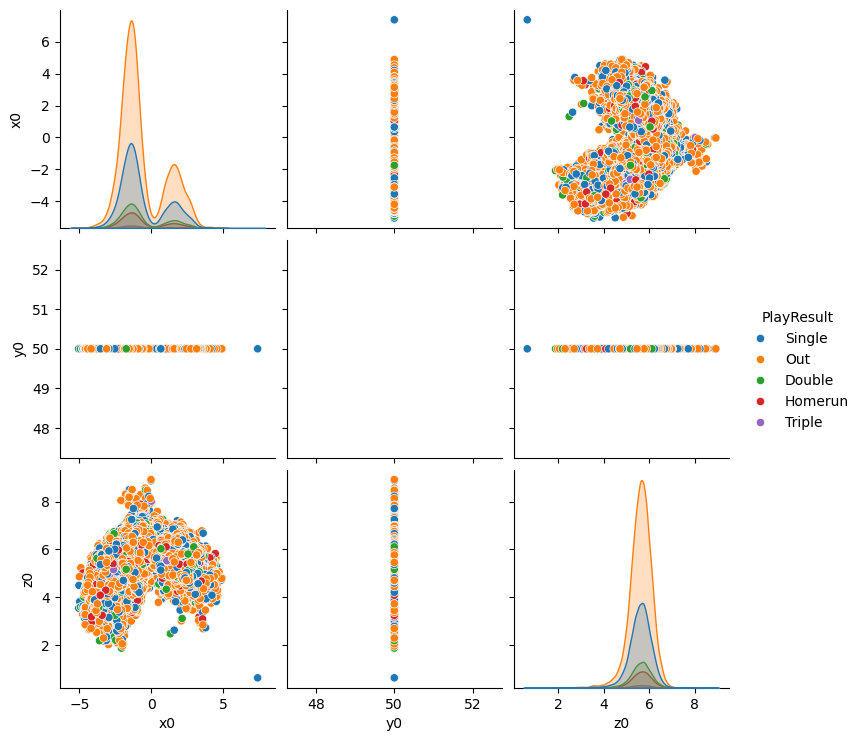

In [39]:
import seaborn as sb

# analyze subset of pitch location versus play result
df_pitch_loc = df[['x0', 'y0', 'z0', 'PlayResult']]


# create the pair plot
sb.pairplot(df_pitch_loc.dropna(), hue='PlayResult')

In [27]:
# column y0 has the same value for every pitch (50.0 feet is the standard release point), so it can be dropped
df = df.drop(['y0'], axis=1)

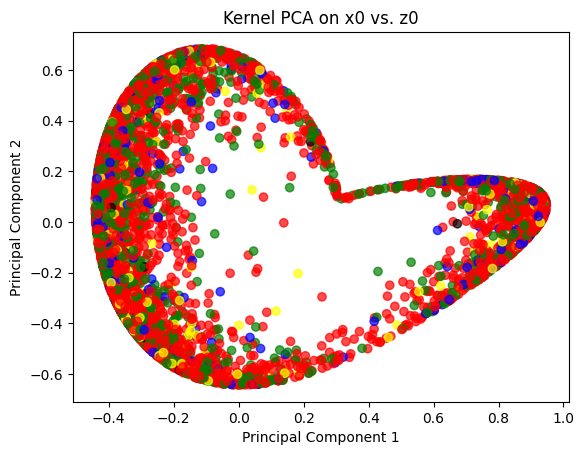

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# Sample the DataFrame and drop missing values
small_df_for_graphing = df.sample(n=5000, random_state=42)
small_df_for_graphing.dropna(subset=['x0', 'z0', 'PlayResult'], inplace=True)

# Stack x0 and z0 into a feature matrix
X = np.vstack((small_df_for_graphing['x0'], small_df_for_graphing['z0'])).T

# RBF kernel transformation
kpca = KernelPCA(kernel="rbf", gamma=0.5)
X_kpca = kpca.fit_transform(X)

result_colors = {"Single": "green", "Out": "red", "Double": "blue", "Homerun": "yellow", "Triple": "black"}

# proper colors
colors = [result_colors[result] for result in small_df_for_graphing['PlayResult']]

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=colors, alpha=0.7)
plt.title("Kernel PCA on x0 vs. z0")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### Exploring using kernel transformation functions to identify patterns in the distributions between pitch locations and play result

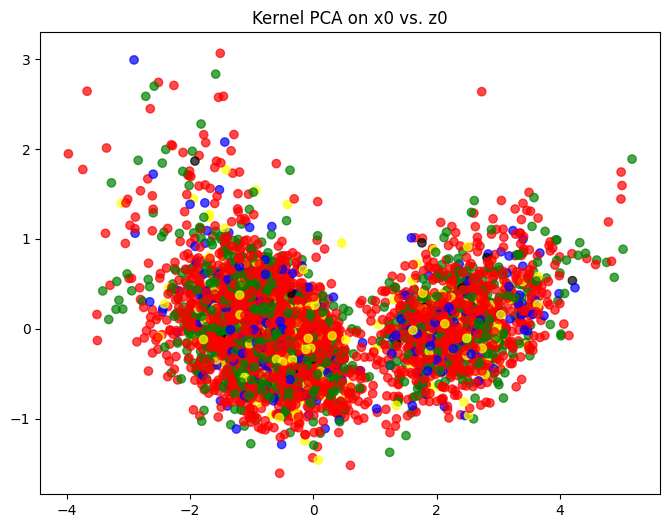

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# Assuming small_df_for_graphing has 'x0' and 'z0' columns and 'PlayResult'
# Stack x0 and z0 into a feature matrix
X = np.vstack((small_df_for_graphing['x0'], small_df_for_graphing['z0'])).T

# linear kernel transformation
kpca = KernelPCA(kernel="linear")  
X_kpca = kpca.fit_transform(X)

# colors for different play results
result_colors = {
    "Single": "green", 
    "Out": "red", 
    "Double": "blue", 
    "Homerun": "yellow", 
    "Triple": "black"
}

colors = [result_colors[result] for result in small_df_for_graphing['PlayResult']]

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=colors, alpha=0.7)
plt.title("Kernel PCA on x0 vs. z0")
plt.show()


#### Exploring relationships between pitch break movement in the horizontal and vertical directions and play result

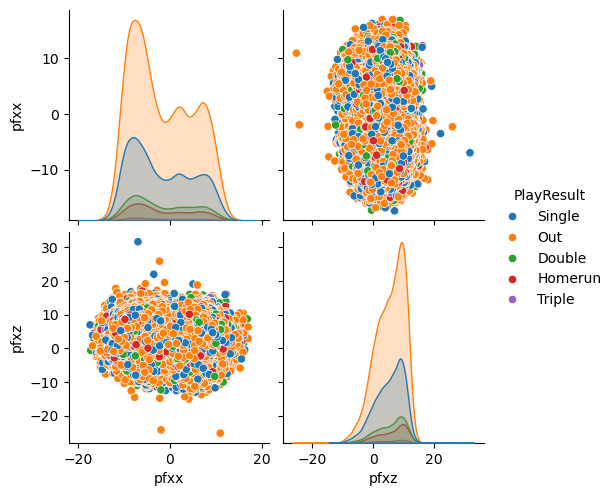

In [43]:
# analyzing pair of pfxx and pfxz for horizontal and vertical movement
# analyze subset of pitch location versus play result
df_pitch_movement = df[['pfxx', 'pfxz', 'PlayResult']]


# create the pair plot
sb.pairplot(df_pitch_movement.dropna(), hue='PlayResult')

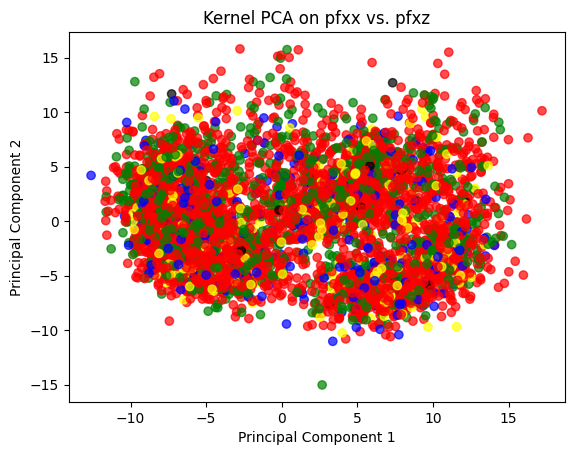

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import KernelPCA

# Assuming small_df_for_graphing is the DataFrame with your original data
# Create feature matrix with relevant columns (pfxx and pfxz)
X = np.vstack((small_df_for_graphing['pfxx'], small_df_for_graphing['pfxz'])).T

# Apply Kernel PCA transformation
kpca = KernelPCA(kernel="linear")
X_kpca = kpca.fit_transform(X)

# Subset the colors based on the same indices as X_kpca
# Ensure the colors list matches the size of X_kpca
result_colors = {"Single": "green", "Out": "red", "Double": "blue", "Homerun": "yellow", "Triple": "black"}
colors = [result_colors[result] for result in small_df_for_graphing['PlayResult'][:X_kpca.shape[0]]]

# Plot the transformed data with the correct number of colors
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=colors, alpha=0.7)
plt.title("Kernel PCA on pfxx vs. pfxz")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [28]:
df['PlayResult'].value_counts()

PlayResult
Out        144543
Single      59509
Double      17617
Homerun     11378
Triple       1847
Name: count, dtype: int64

# More Data Exploration

## Histograms of Numerical Features
Examining histograms of various numerical features of a thrown pitch, including speed, spin, break, and angles

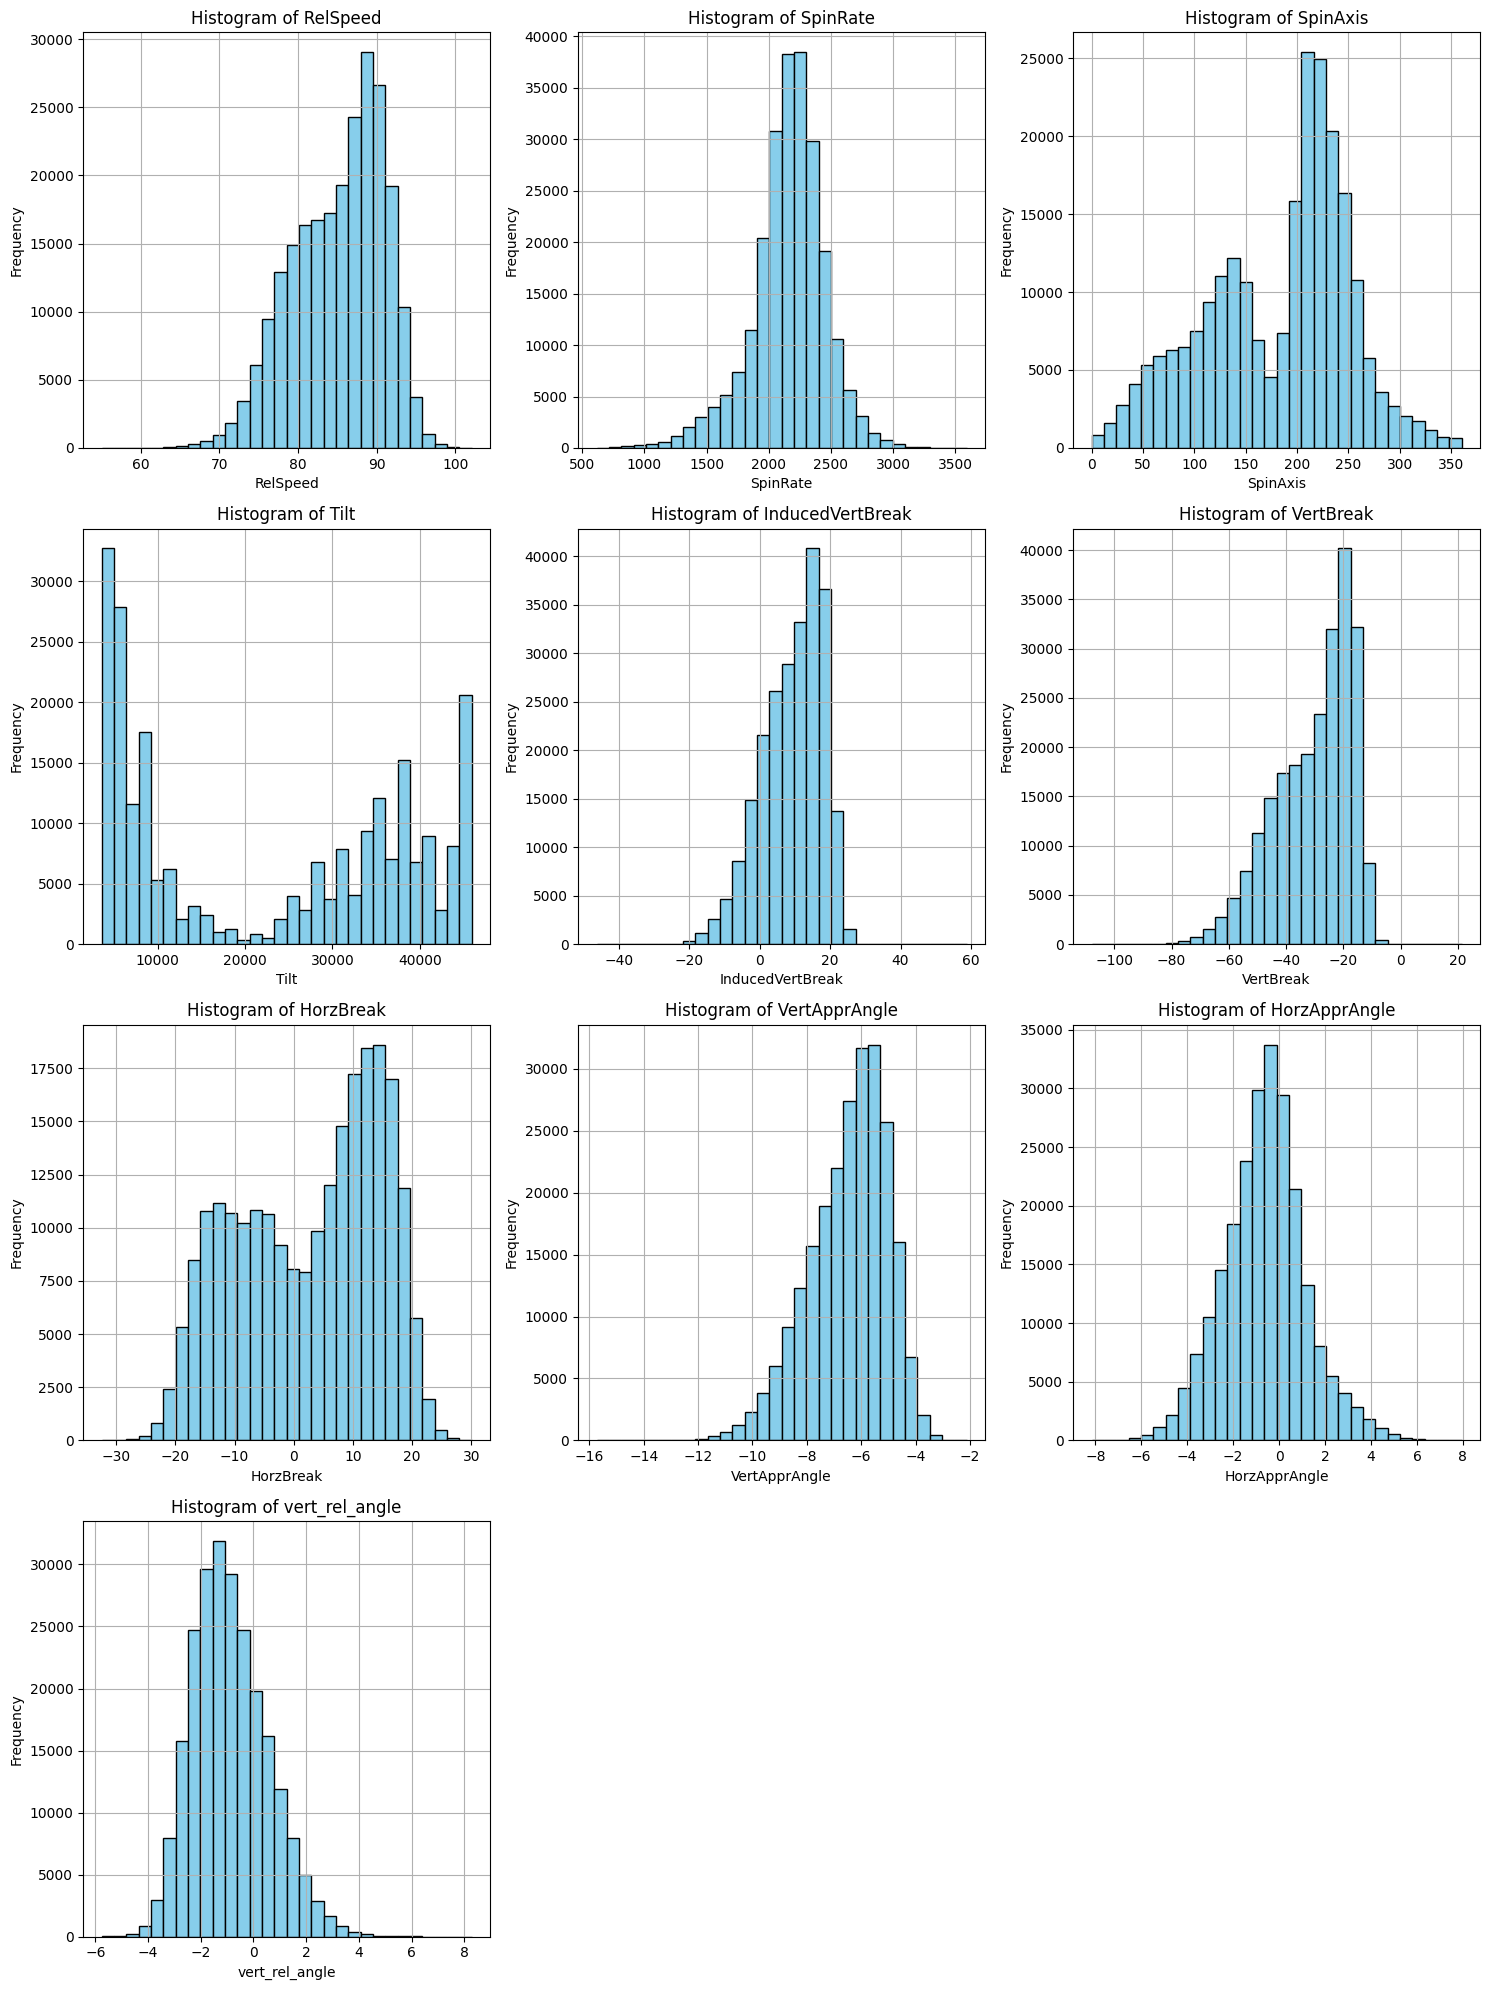

In [ ]:
from matplotlib import pyplot as plt

# cols to plot
columns = [
    'RelSpeed', 'SpinRate', 'SpinAxis', 'Tilt', 'InducedVertBreak', 
    'VertBreak', 'HorzBreak', 'VertApprAngle', 'HorzApprAngle', 'vert_rel_angle'
]

# rows and cols for the grids
num_cols = 3 
num_rows = (len(columns) + num_cols - 1) // num_cols 

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten() 

# Plot each column
for i, col in enumerate(columns):
    if col in df.columns:
        df[col].hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].axis('off') 

# do not show any unused subplots
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Analyzing relationship between PlayResult and Inning Number
Exploring the question of whether play result is impacted by which inning in the game the pitch is thrown. It looks like there is an impact, so we will keep the column in the dataset. As the game continues into extra innings, specifically after the 15th inning, there tends to be more outs.

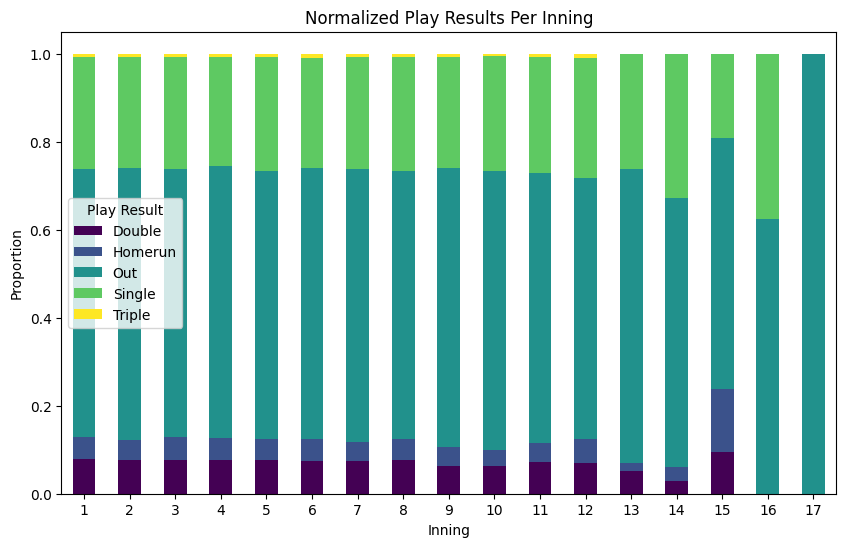

In [33]:
# Count play results per inning
play_results_per_inning = df.groupby(['Inning', 'PlayResult']).size().reset_index(name='count')

pivot_table = play_results_per_inning.pivot(index='Inning', columns='PlayResult', values='count').fillna(0)

# Normalize by row totals (each inning)
normalized_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

normalized_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Normalized Play Results Per Inning')
plt.xlabel('Inning')
plt.ylabel('Proportion')
plt.legend(title='Play Result')
plt.xticks(rotation=0)
plt.show()

In [29]:
df.columns

Index(['PitchNo', 'Inning', 'PAofInning', 'PitchofPA', 'PlayResult',
       'OutsOnPlay', 'RunsScored', 'Balls', 'Strikes', 'Outs',
       'TaggedPitchType', 'RelSpeed', 'SpinRate', 'SpinAxis', 'Tilt',
       'InducedVertBreak', 'VertBreak', 'HorzBreak', 'VertApprAngle',
       'HorzApprAngle', 'vert_rel_angle', 'horz_rel_angle', 'RelHeight',
       'RelSide', 'Extension', 'PlateLocHeight', 'PlateLocSide', 'zone_time',
       'EffectiveVelo', 'SpeedDrop', 'position_110x', 'position_110y', 'pfxx',
       'pfxz', 'x0', 'z0', 'vx0', 'vy0', 'vz0', 'ax0', 'ay0', 'az0',
       'inning_half_Top', 'PitcherThrows_R', 'BatterSide_R',
       'PitchCall_InPlay', 'PitchCall_StrikeSwinging'],
      dtype='object')

# Feature Engineering

## Creating New Features

### Creating velocity

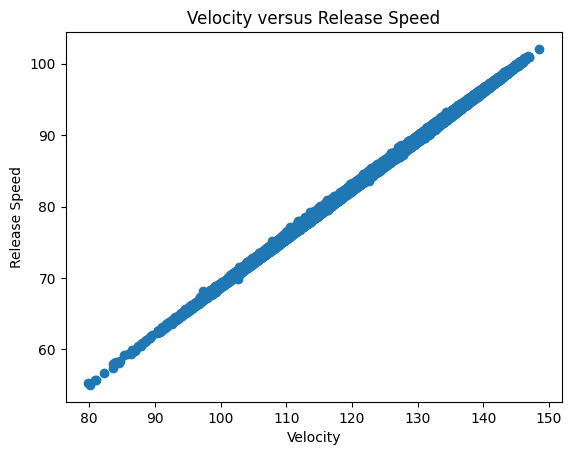

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# creating velocity using all three velocity components: vx0, vy0, vz0
df.dropna(subset=['vx0', 'vy0', 'vz0'], inplace=True)
df['velocity'] = np.sqrt(df['vx0']**2 + df['vy0']**2 + df['vz0']**2)

# plot versus RelSpeed
plt.scatter(df['velocity'], df['RelSpeed'])
plt.title("Velocity versus Release Speed")
plt.xlabel("Velocity")
plt.ylabel("Release Speed")
plt.show()

#### Velocity and release speed are highly correlated, so we can drop release speed because velocity is more helpful to know the speed of the ball when it is about to be hit by the batter

In [31]:
cols_to_drop = ['RelSpeed', 'vx0', 'vy0', 'vz0']
df = df.drop(cols_to_drop,axis=1)

### Creating acceleration

In [32]:
import numpy as np
# create acceleration using all three acceleration components: ax0, ay0, az0
df.dropna(subset=['ax0', 'ay0', 'az0'], inplace=True)
df['acceleration'] = np.sqrt(df['ax0']**2 + df['ay0']**2 + df['az0']**2)

cols_to_drop = ['ax0', 'ay0', 'az0']
df = df.drop(cols_to_drop,axis=1)

<Axes: title={'center': 'acceleration'}, xlabel='PlayResult'>

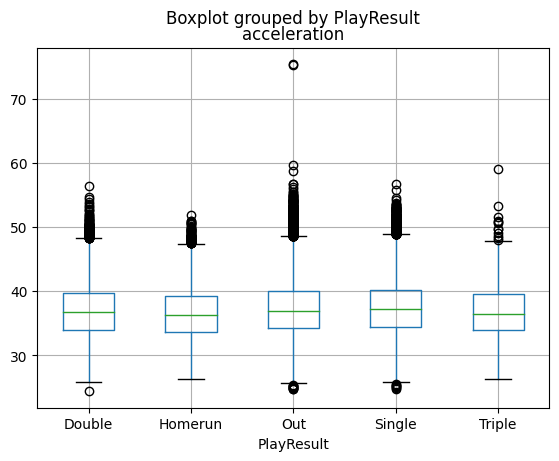

In [33]:
df.boxplot(column='acceleration', by='PlayResult')

### Creating total break magnitude to combine vertical and horizontal break
Looking at the histogram for VertBreak versus InducedVertBreak, we chose to use VertBreak in our calculations because HorzBreak and VertBreak are calculated as unaffected by gravity, while InducedVertBreak is calculated as affected by gravity. Also, the scale of VertBreak ranges negative values, specifically from -80 to 0

array([<Axes: title={'center': 'VertBreak'}, xlabel='PlayResult'>,
       <Axes: title={'center': 'HorzBreak'}, xlabel='PlayResult'>],
      dtype=object)

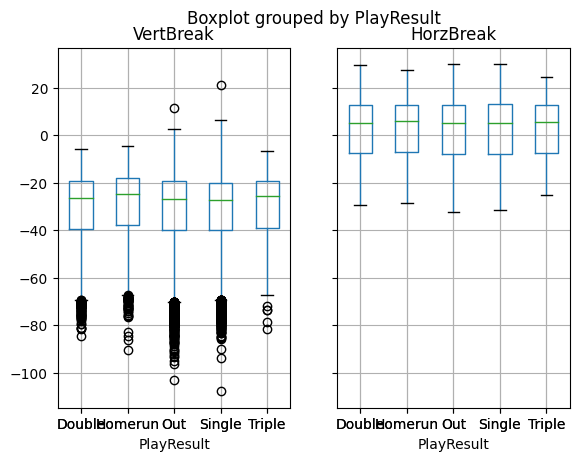

In [34]:
df.boxplot(column=['VertBreak', 'HorzBreak'], by='PlayResult')

In [35]:
df.dropna(subset=['VertBreak', 'HorzBreak'], inplace=True)
df['TotalBreak'] = np.sqrt(df['VertBreak']**2 + df['HorzBreak']**2)

cols_to_drop = ['InducedVertBreak', 'VertBreak', 'HorzBreak']
df = df.drop(cols_to_drop,axis=1)

<Axes: title={'center': 'TotalBreak'}, xlabel='PlayResult'>

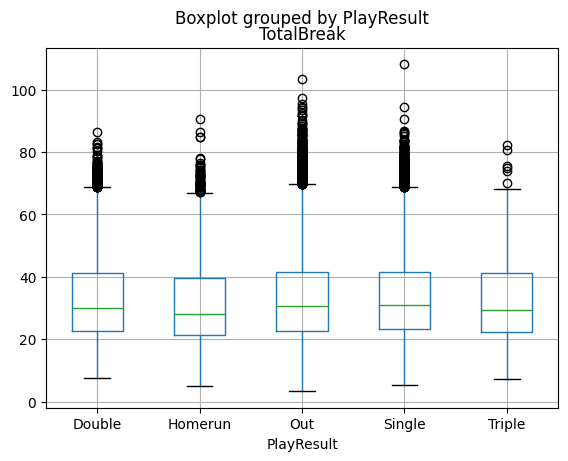

In [36]:
df.boxplot(column='TotalBreak', by='PlayResult')

### Combine all fastball pitch types into a new feature: Condensed Pitch Type
There are many subsets of individual pitches, such as Four-Seam versus Two-Seam versus One-Seam for fastballs, that do not provide much value. Thus, we are combining the pitches into their general categories: fastball, breaking ball, off-speed. This becomes a new feature called Condensed Pitch Type.

Note: cutters can be defined as fastballs or breaking balls depending on the pitcher. We chose fastballs because it is more generally classified in that manner.

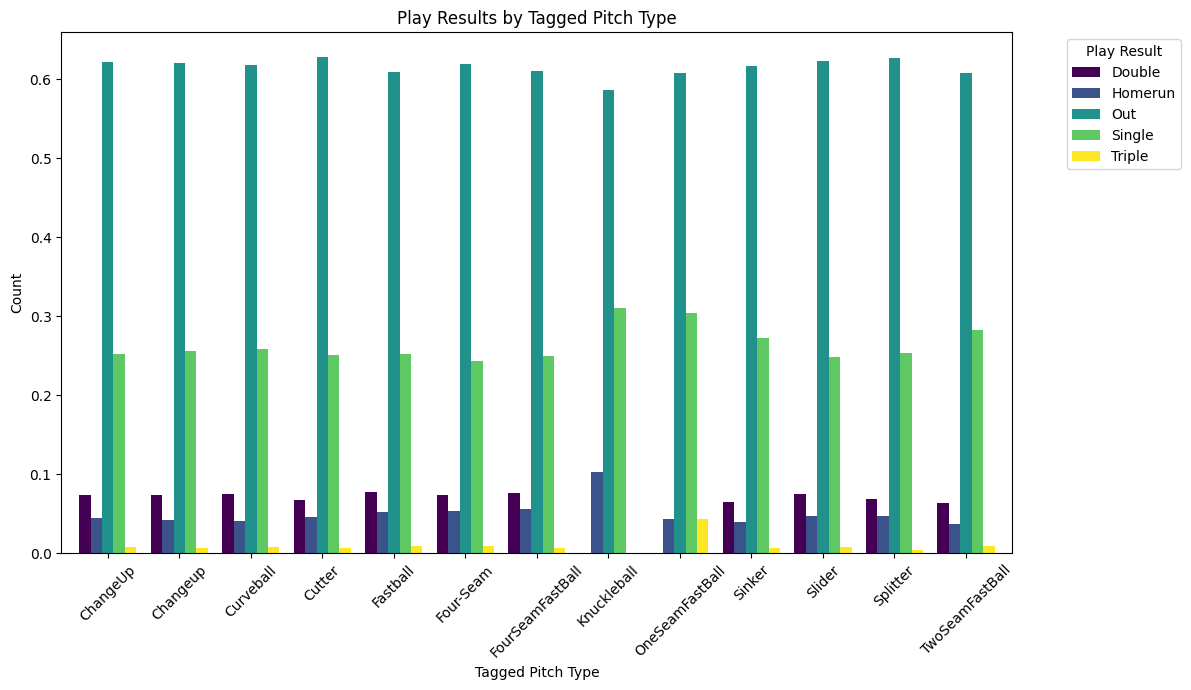

In [37]:
# Count play results per tagged pitch type
play_results_per_taggedpt = df.groupby(['TaggedPitchType', 'PlayResult']).size().reset_index(name='count')

pivot_table = play_results_per_taggedpt.pivot(index='TaggedPitchType', columns='PlayResult', values='count').fillna(0)
normalized_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# grouped bar chart
normalized_table.plot(kind='bar', stacked=False, figsize=(12, 7), colormap='viridis', width=0.8)

plt.title('Play Results by Tagged Pitch Type')
plt.xlabel('Tagged Pitch Type')
plt.ylabel('Count')
plt.legend(title='Play Result', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
pitch_type_map = {'Four-Seam': 'Fastball',
                  'FourSeamFastBall': 'Fastball',
                  'TwoSeamFastBall': 'Fastball',
                  'OneSeamFastBall': 'Fastball',
                  'Cutter': 'Fastball',
                  'Sinker': 'Fastball',
                  'Curveball': 'Breaking Ball',
                  'Slider': 'Breaking Ball',
                  'ChangeUp': 'Off-Speed',
                  'Changeup': 'Off-Speed',
                  'Splitter': 'Off-Speed',
                  'Knuckleball': 'Off-Speed' }
df['CondensedPitchType'] = df['TaggedPitchType'].map(pitch_type_map)

cols_to_drop = ['TaggedPitchType']
df = df.drop(cols_to_drop,axis=1)

There was not much variation in the distribution of play results for each individual tagged pitch type, as shown above, and this same pattern follows for condensed pitch type

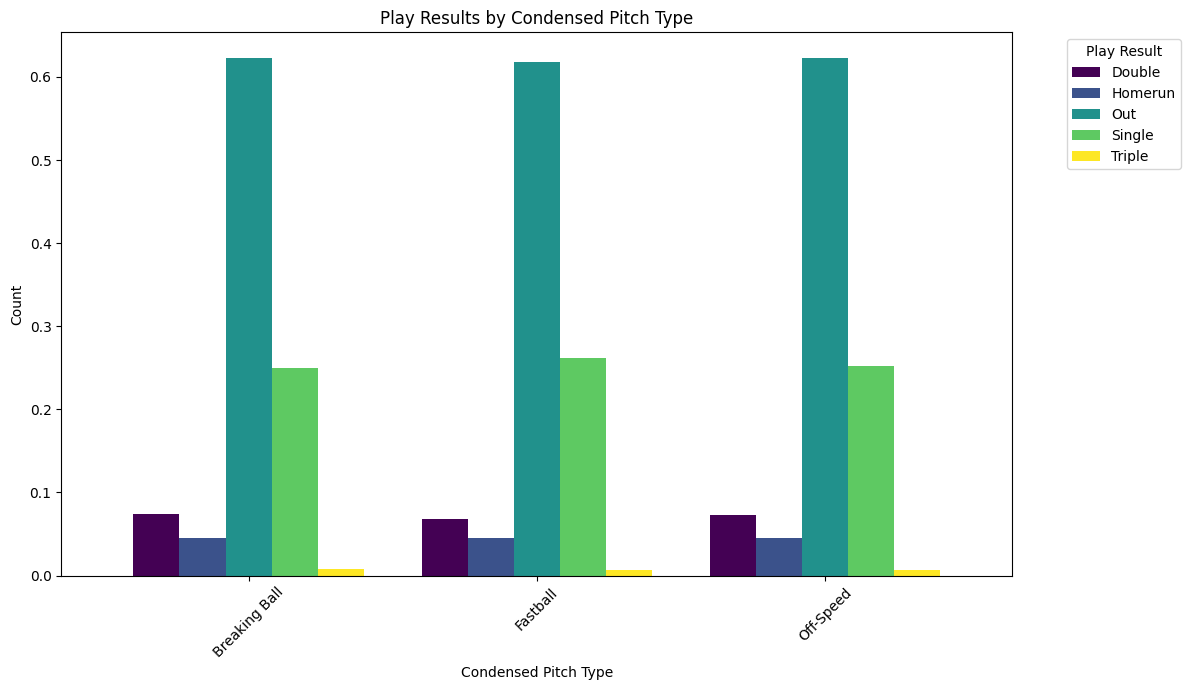

In [39]:

# Count play results per tagged pitch type
play_results_per_taggedpt = df.groupby(['CondensedPitchType', 'PlayResult']).size().reset_index(name='count')

pivot_table = play_results_per_taggedpt.pivot(index='CondensedPitchType', columns='PlayResult', values='count').fillna(0)
normalized_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# grouped bar chart
normalized_table.plot(kind='bar', stacked=False, figsize=(12, 7), colormap='viridis', width=0.8)

plt.title('Play Results by Condensed Pitch Type')
plt.xlabel('Condensed Pitch Type')
plt.ylabel('Count')
plt.legend(title='Play Result', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### One-hot encoding CondensedPitchType since it is categorical column

In [40]:
cols_to_encode = ['CondensedPitchType']
df = pd.get_dummies(df, columns=cols_to_encode)
df

,PitchNo,Inning,PAofInning,PitchofPA,PlayResult,OutsOnPlay,RunsScored,Balls,Strikes,Outs,...,PitcherThrows_R,BatterSide_R,PitchCall_InPlay,PitchCall_StrikeSwinging,velocity,acceleration,TotalBreak,CondensedPitchType_Breaking Ball,CondensedPitchType_Fastball,CondensedPitchType_Off-Speed
8,188,6,3,3,Single,0,0,0,2,2,...,True,True,True,False,119.713089,44.064798,42.583510,True,False,False
23,100,3,3,3,Out,1,0,0,2,1,...,False,True,True,False,121.043387,35.439894,30.167242,False,False,False
32,138,5,3,3,Single,0,1,0,2,0,...,True,False,True,False,124.808673,37.186551,31.292045,False,False,True
33,232,7,5,3,Double,0,2,1,1,2,...,True,False,True,False,106.918532,39.766652,53.420023,True,False,False
35,182,5,6,6,Single,0,1,3,2,2,...,True,False,True,False,134.252743,44.140171,35.702674,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513395,109,3,6,4,Single,1,1,2,1,2,...,True,True,True,False,120.782252,31.143393,29.916492,True,False,False
1513398,54,2,1,6,Out,1,0,3,2,0,...,False,True,True,False,119.680723,40.662484,42.953688,True,False,False
1513407,103,3,4,4,Single,0,0,1,2,2,...,False,True,True,False,122.820930,36.240069,36.001694,False,False,True
1513408,94,3,2,2,Out,1,0,0,1,0,...,False,True,True,False,118.207001,38.536471,42.810005,True,False,False


In [41]:
print(df.shape)

(234894, 42)


### Separating predictor columns from target column: PlayResult

In [ ]:
# initialize scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #note, we realize we do not scale here b/c we do not want data leakage

data_Y = df['PlayResult'].values.ravel()

data_X = df.drop(['PlayResult'], axis = 1)

# Model Training

In [43]:
#Imports 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Decision Tree Model Training

In [49]:
# Train a Decision Tree

# 80-20 split
x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, 
    test_size=0.20, random_state=5)


print("# train set records:", x_train.shape[0])
print("# test set records:", x_test.shape[0])

# train set records: 187915
# test set records: 46979


In [ ]:
print("Variation: entropy")

dt_clf = DecisionTreeClassifier(criterion="entropy") # create classifier
dt_clf = dt_clf.fit(x_train, y_train) # fit it to data
preds = dt_clf.predict(x_test) # predict on holdout/test data
print('Accuracy on test data is:', (accuracy_score(y_test, preds))) 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

Variation: entropy
Accuracy on test data is: 0.9276059515953937
[[ 2109   160    32  1040   183]
 [  165  1974     0    54    47]
 [   36     0 28773    86     1]
 [ 1052    43    66 10659   112]
 [  166    42     1   115    63]]
              precision    recall  f1-score   support

      Double       0.60      0.60      0.60      3524
     Homerun       0.89      0.88      0.89      2240
         Out       1.00      1.00      1.00     28896
      Single       0.89      0.89      0.89     11932
      Triple       0.16      0.16      0.16       387

    accuracy                           0.93     46979
   macro avg       0.71      0.71      0.71     46979
weighted avg       0.93      0.93      0.93     46979



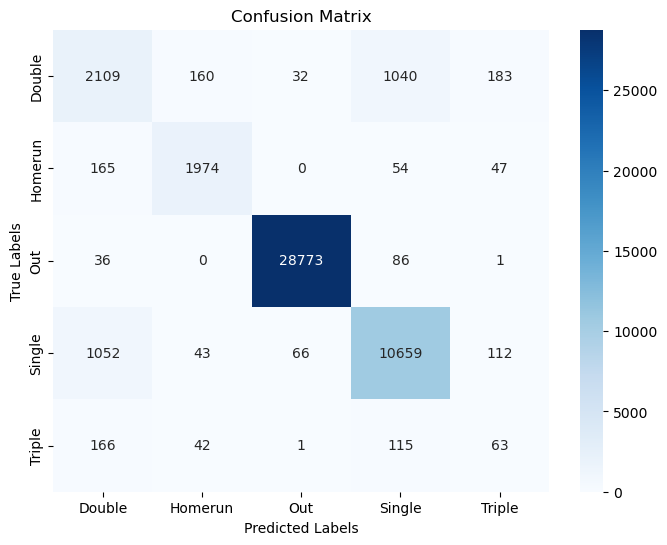

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, preds)

labels = ['Double', 'Homerun', 'Out', 'Single', 'Triple']

# Create a heatmap 
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Decision Tree Grid Search to find best params and accuracy
from sklearn.model_selection import GridSearchCV

params = {"max_depth": [5,10,15,20] , 
         "min_samples_leaf": [5,10,15,20], 
         "max_features": [5,10,15]}

# doing inner loop of cross validation with manually separated "training set"

# Gridsearch -- Pass in DT classifier, testing parameters, 5 folds, and accuracy scoring criteria
grid_search = GridSearchCV(dt_clf, params, cv=5, scoring='accuracy')

# fit to data
grid_search.fit(x_train, y_train)

# best parameters found
print("Best Params", grid_search.best_params_)
# What was the accuracy at this best max_depth?
print("Accuracy:", grid_search.best_score_ * 100)

Best Params {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 10}
Accuracy: 94.13883936886359


In [67]:
# Decision Tree Model Evaluation: Confusion Matrix + Classification Report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# get the predictions with best estimator from grid search
pred_Y = cross_val_predict(grid_search.best_estimator_, data_X, data_Y, cv=10)


print(confusion_matrix(data_Y, pred_Y))
print(classification_report(data_Y, pred_Y))

# It is likely that the class imbalance is affecting the results of certain classes in confusion matrix

[[ 11473   1349    262   4501     32]
 [   733  10541      5     97      2]
 [    38      3 144415     87      0]
 [  4181    434    526  54351     17]
 [  1002    319     22    446     58]]
              precision    recall  f1-score   support

      Double       0.66      0.65      0.65     17617
     Homerun       0.83      0.93      0.88     11378
         Out       0.99      1.00      1.00    144543
      Single       0.91      0.91      0.91     59509
      Triple       0.53      0.03      0.06      1847

    accuracy                           0.94    234894
   macro avg       0.79      0.70      0.70    234894
weighted avg       0.94      0.94      0.94    234894



### Improving the decision tree model using class imbalance techniques

Looking at the confusion matrix as well as the precision and recall scores for each class label for Play Result, it appears we are classifying Outs, Singles, and Homeruns well, but Doubles and particularly Triples are being misclassified at a high rate. This could be resulting from the class imbalance in our dataset between the Play Result labels, where we have around 75 times more Outs and 50 times more Singles than Triples in our dataset.

In [68]:
df['PlayResult'].value_counts()

Out        144543
Single      59509
Double      17617
Homerun     11378
Triple       1847
Name: PlayResult, dtype: int64

#### Using SMOTE to oversample triples

In [69]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Oversample label 3 using SMOTE
smote = SMOTE(sampling_strategy={'Triple': 15000}, random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Use Decision Tree with tuned hyperparameters and adjust class weights
dt_clf = DecisionTreeClassifier(
    max_depth=10,
    max_features=15,
    min_samples_leaf=10,
    random_state=42
)
dt_clf.fit(x_train_balanced, y_train_balanced)

# Predict on test data
preds = dt_clf.predict(x_test)

# Evaluate the model
print('Accuracy on test data is:', accuracy_score(y_test, preds))
print('Confusion Matrix:')
print(confusion_matrix(y_test, preds))
print('Classification Report:')
print(classification_report(y_test, preds))

/Users/kerrynxu/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Accuracy on test data is: 0.9210498307754529
Confusion Matrix:
[[ 1729   215    33   784   763]
 [  120  1958     0    13   149]
 [    4     2 28863    20     7]
 [  652    81    76 10568   555]
 [  100    55     1    79   152]]
Classification Report:
              precision    recall  f1-score   support

      Double       0.66      0.49      0.56      3524
     Homerun       0.85      0.87      0.86      2240
         Out       1.00      1.00      1.00     28896
      Single       0.92      0.89      0.90     11932
      Triple       0.09      0.39      0.15       387

    accuracy                           0.92     46979
   macro avg       0.70      0.73      0.70     46979
weighted avg       0.94      0.92      0.93     46979



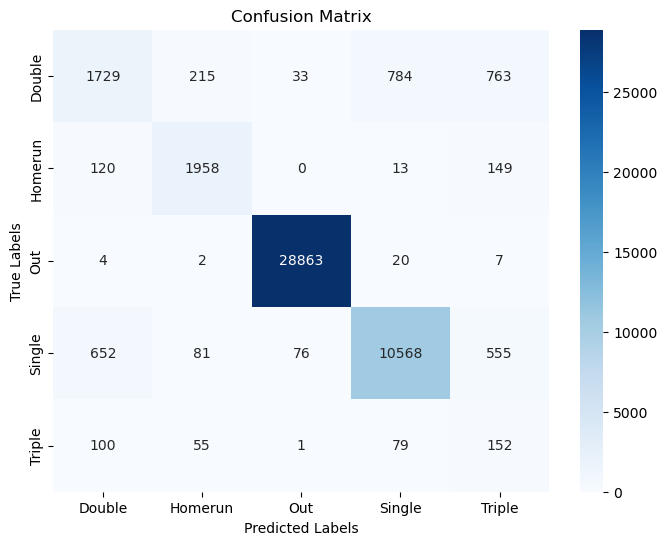

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, preds)

labels = ['Double', 'Homerun', 'Out', 'Single', 'Triple']

# Create a heatmap u
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Using threshold for triples

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train a Random Forest with class weights
dt_clf = DecisionTreeClassifier(class_weight={'Out': 1, 'Single': 1, 'Double': 1, 'Triple': 10, 'Homerun': 1}, random_state=42)
dt_clf.fit(x_train, y_train)

probs = dt_clf.predict_proba(x_test)
preds = dt_clf.predict(x_test)

# Adjust predictions for label 3 based on a custom threshold
threshold = 0.35
preds[(probs[:, 3] > threshold)] = 'Triple'

# Evaluate
print('Accuracy on test data is:', accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

# Increased precision with threshold, meaning we are only predicting triples if we are absolutely sure it is a triple
# However, decreased recall, so we are identifying less triples correctly

Accuracy on test data is: 0.7024415164222312
[[ 2114   196    32     0  1182]
 [  189  1947     0     0   104]
 [   36     0 28752     0   108]
 [ 1075    61    69     0 10727]
 [  166    33     1     0   187]]


/Users/kerrynxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kerrynxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      Double       0.59      0.60      0.60      3524
     Homerun       0.87      0.87      0.87      2240
         Out       1.00      1.00      1.00     28896
      Single       0.00      0.00      0.00     11932
      Triple       0.02      0.48      0.03       387

    accuracy                           0.70     46979
   macro avg       0.49      0.59      0.50     46979
weighted avg       0.70      0.70      0.70     46979



/Users/kerrynxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
# Balance the data
smote = SMOTE(sampling_strategy={'Triple': 5000}, random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Train a decision tree with tuned hyperparameters
dt_clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight={'Out': 1, 'Single': 1, 'Double': 1, 'Triple': 10, 'Homerun': 1},
    random_state=42
)
dt_clf.fit(x_train_balanced, y_train_balanced)

# Predict and evaluate
preds = dt_clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

# Oversampling and adding class weights to favor label 3 (triples) helps increase the recall for label 3

Accuracy: 0.9003171629877179
[[ 1163    87    30   607  1637]
 [   19  1755     0    10   456]
 [   20     0 28851    20     5]
 [  239    27    67 10238  1361]
 [   32    12     0    54   289]]
              precision    recall  f1-score   support

      Double       0.79      0.33      0.47      3524
     Homerun       0.93      0.78      0.85      2240
         Out       1.00      1.00      1.00     28896
      Single       0.94      0.86      0.90     11932
      Triple       0.08      0.75      0.14       387

    accuracy                           0.90     46979
   macro avg       0.75      0.74      0.67     46979
weighted avg       0.96      0.90      0.92     46979



#### Using a combination of oversampling triples and undersampling outs

In [74]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Undersample label 0 (outs)
undersampler = RandomUnderSampler(sampling_strategy={'Out': 50000}, random_state=42)
x_train_undersampled, y_train_undersampled = undersampler.fit_resample(x_train, y_train)

# Oversample label 3 (triples)
smote = SMOTE(sampling_strategy={'Triple': 10000}, random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_undersampled, y_train_undersampled)

# Train a Random Forest with class weights
dt_clf = DecisionTreeClassifier(random_state=45)
dt_clf.fit(x_train_balanced, y_train_balanced)

# Predict on test data
preds = dt_clf.predict(x_test)

# Evaluate
print('Accuracy on test data is:', accuracy_score(y_test, preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

Accuracy on test data is: 0.9157495902424487
Confusion Matrix:
[[ 1927   141    30   914   512]
 [  150  1938     0    51   101]
 [   79     0 28620   190     7]
 [  955    50    62 10447   418]
 [  165    42     0    91    89]]

Classification Report:
              precision    recall  f1-score   support

      Double       0.59      0.55      0.57      3524
     Homerun       0.89      0.87      0.88      2240
         Out       1.00      0.99      0.99     28896
      Single       0.89      0.88      0.88     11932
      Triple       0.08      0.23      0.12       387

    accuracy                           0.92     46979
   macro avg       0.69      0.70      0.69     46979
weighted avg       0.93      0.92      0.92     46979



In [75]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Undersample label 0 (outs)
undersampler = RandomUnderSampler(sampling_strategy={'Out': 25000, 'Single': 25000}, random_state=42)
x_train_undersampled, y_train_undersampled = undersampler.fit_resample(x_train, y_train)

# Oversample label 3 (triples)
smote = SMOTE(sampling_strategy={'Triple': 10000}, random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_undersampled, y_train_undersampled)

# Train a Random Forest with class weights
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train_balanced, y_train_balanced)

# Predict on test data
preds = dt_clf.predict(x_test)

# Evaluate
print('Accuracy on test data is:', accuracy_score(y_test, preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

Accuracy on test data is: 0.9110027884799591
Confusion Matrix:
[[ 2167   162    32   636   527]
 [  149  1951     0    31   109]
 [  145     1 28542   201     7]
 [ 1275    59    63 10051   484]
 [  186    44     0    70    87]]

Classification Report:
              precision    recall  f1-score   support

      Double       0.55      0.61      0.58      3524
     Homerun       0.88      0.87      0.88      2240
         Out       1.00      0.99      0.99     28896
      Single       0.91      0.84      0.88     11932
      Triple       0.07      0.22      0.11       387

    accuracy                           0.91     46979
   macro avg       0.68      0.71      0.69     46979
weighted avg       0.93      0.91      0.92     46979



## Multi-layered Model Training
Our confusion matrix shows that we are classifying 'Outs' and 'Singles' very well, but we are struggling to differentiate between doubles, triples, and homeruns. Often, our model will classify doubles as singles or triples, and the model misclassifies triples as doubles or homeruns. Although these are close results, we want to explore a multi-layered model that can focus on differentiating between doubles, triples, and homeruns.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# easy and hard classes
easy_classes = ['Out', 'Single']  # Outs and Singles
hard_classes = ['Double', 'Triple', 'Homerun']  # Doubles, Triples, Homeruns

# Separate easy and hard classes from the original data
x_train_easy = x_train[np.isin(y_train, easy_classes)]
y_train_easy = y_train[np.isin(y_train, easy_classes)]
x_train_hard = x_train[np.isin(y_train, hard_classes)]
y_train_hard = y_train[np.isin(y_train, hard_classes)]

# Train Random Forest classifier for easy classes (Outs, Singles)
easy_classifier = RandomForestClassifier(random_state=42)
easy_classifier.fit(x_train_easy, y_train_easy)

# Train Random Forest classifier for hard classes (Doubles, Triples, Homeruns)
hard_classifier = RandomForestClassifier(random_state=42)
hard_classifier.fit(x_train_hard, y_train_hard)

# Step 1: Predict on the test data
# Separate the test set into easy and hard classes
x_test_easy = x_test[np.isin(y_test, easy_classes)]
y_test_easy = y_test[np.isin(y_test, easy_classes)]
x_test_hard = x_test[np.isin(y_test, hard_classes)]
y_test_hard = y_test[np.isin(y_test, hard_classes)]

# Predict using the easy classifier for easy classes
preds_easy = easy_classifier.predict(x_test_easy)

# Predict using the hard classifier for hard classes
preds_hard = hard_classifier.predict(x_test_hard)

# Combine predictions: Assign easy class predictions to easy classes and hard class predictions to hard classes
final_preds = np.copy(y_test)
final_preds[np.isin(y_test, easy_classes)] = preds_easy
final_preds[np.isin(y_test, hard_classes)] = preds_hard

print('Accuracy on test data is:', accuracy_score(y_test, final_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, final_preds))
print("\nClassification Report:")
print(classification_report(y_test, final_preds))

Accuracy on test data is: 0.9822261010238618
Confusion Matrix:
[[ 3264   260     0     0     0]
 [  110  2130     0     0     0]
 [    0     0 28893     3     0]
 [    0     0    83 11849     0]
 [  314    65     0     0     8]]

Classification Report:
              precision    recall  f1-score   support

      Double       0.89      0.93      0.91      3524
     Homerun       0.87      0.95      0.91      2240
         Out       1.00      1.00      1.00     28896
      Single       1.00      0.99      1.00     11932
      Triple       1.00      0.02      0.04       387

    accuracy                           0.98     46979
   macro avg       0.95      0.78      0.77     46979
weighted avg       0.98      0.98      0.98     46979



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Define easy and hard classes
easy_classes = ['Out']  # Outs (binary classification)
hit_classes = ['Single', 'Double', 'Triple', 'Homerun']  # Hit types (multi-class classification)

# Step 1: Separate original dataset into two parts:
#  - 'Out' vs 'Hit' (for binary classification)
#  - 'Hit' classification for single, double, triple, and homerun (for multi-class classification)

# Create binary labels: 1 for 'Hit' and 0 for 'Out'
y_train_binary = np.where(np.isin(y_train, easy_classes), 'Out', 'Hit')
y_test_binary = np.where(np.isin(y_test, easy_classes), 'Out', 'Hit')

# For hits, train a classifier to predict the specific type (Single, Double, Triple, Homerun)
x_train_hit = x_train[np.isin(y_train, hit_classes)]
y_train_hit = y_train[np.isin(y_train, hit_classes)]
x_test_hit = x_test[np.isin(y_test, hit_classes)]
y_test_hit = y_test[np.isin(y_test, hit_classes)]

# Step 2: Train the binary classifier to separate 'Out' vs 'Hit'
binary_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
binary_classifier.fit(x_train, y_train_binary)

# Step 3: Train the classifier to predict specific hit types (Single, Double, Triple, Homerun)
hit_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
hit_classifier.fit(x_train_hit, y_train_hit)

# Step 4: Make predictions on the test set using the binary classifier
pred_binary = binary_classifier.predict(x_test)

# Step 5: For samples classified as 'Hit', predict the specific hit type using the second classifier
final_preds = np.copy(pred_binary)  # Start with the binary classification results

# Only predict hit type for the 'Hit' class
hit_indices = pred_binary == 'Hit'
final_preds[hit_indices] = hit_classifier.predict(x_test[hit_indices])

# Step 6: Evaluate the model
print('Accuracy on test data is:', accuracy_score(y_test, final_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, final_preds))
print("\nClassification Report:")
print(classification_report(y_test, final_preds))

Accuracy on test data is: 0.614870474041593
Confusion Matrix:
[[    0     0     0     0     0     0     0     0     0]
 [ 2166     0   287     0    34  1037     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [   71     0  2153     0     0    16     0     0     0]
 [    4     0     1     0 28886     5     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [  620     0   106     0    78 11128     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [  188     0    66     0     0   123     0    10     0]]

Classification Report:


/Users/kerrynxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kerrynxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         Dou       0.00      0.00      0.00         0
      Double       0.00      0.00      0.00      3524
         Hom       0.00      0.00      0.00         0
     Homerun       0.00      0.00      0.00      2240
         Out       1.00      1.00      1.00     28896
         Sin       0.00      0.00      0.00         0
      Single       0.00      0.00      0.00     11932
         Tri       0.00      0.00      0.00         0
      Triple       0.00      0.00      0.00       387

    accuracy                           0.61     46979
   macro avg       0.11      0.11      0.11     46979
weighted avg       0.61      0.61      0.61     46979



/Users/kerrynxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kerrynxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kerrynxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Us

## Random Forest Model Training

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the RandomForestClassifier
rf_clf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': list(range(15, 21)),  # 35 to 45 inclusive
    'min_samples_leaf': [500, 1000],
    'max_features': ['sqrt', 'log2']
}

# Perform randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    rf_clf, 
    param_distributions=param_grid, 
    n_iter=20,  # Number of random combinations to test
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy for evaluation
    random_state=42  # For reproducibility
)

# Fit the model on the data
random_search.fit(data_X, data_Y)

# Output the best parameters and the best cross-validation score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_ * 100:.2f}%")

# Optionally, you can access the best model directly
best_model = random_search.best_estimator_

# Evaluate the final model on the test set (if you have one)
accuracy = best_model.score(data_X, data_Y) 
print(f"Accuracy: {accuracy * 100:.2f}%")


Best parameters: {'min_samples_leaf': 500, 'max_features': 'sqrt', 'max_depth': 20}
Best CV score: 92.94%
Accuracy: 93.15%


In [ ]:
# Ensemble, Descision Stumps

from sklearn.ensemble import AdaBoostClassifier

# ensemble AdaBoost, 150 base classifiers, decision stump
ensemble_clf = AdaBoostClassifier(n_estimators=150)

# find the accuracy
scores = cross_val_score(ensemble_clf, data_X, data_Y, cv=5) 
print("Accuracy:", scores.mean() * 100)


Accuracy: 87.78556617125422


### Improving Random Forest Model using class imbalance techniques

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Oversample label 3
smote = SMOTE(sampling_strategy={'Triple': 15000}, random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Train a Random Forest with class weights
rf_clf = RandomForestClassifier(class_weight={'Out': 1, 'Single': 1, 'Double': 1, 'Triple': 10, 'Homerun': 1}, random_state=42)
rf_clf.fit(x_train_balanced, y_train_balanced)

# Predict on test data
preds = rf_clf.predict(x_test)
print('Accuracy on test data is:', accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

Accuracy on test data is: 0.9367376913088827
[[28892     3     1     0     0]
 [   88 11053   579   136    76]
 [   42  1011  1920   322   229]
 [    1   118   145    63    60]
 [    0    12    97    52  2079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28896
           1       0.91      0.93      0.92     11932
           2       0.70      0.54      0.61      3524
           3       0.11      0.16      0.13       387
           4       0.85      0.93      0.89      2240

    accuracy                           0.94     46979
   macro avg       0.71      0.71      0.71     46979
weighted avg       0.94      0.94      0.94     46979



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train a Random Forest with class weights
rf_clf = RandomForestClassifier(class_weight={'Out': 1, 'Single': 1, 'Double': 1, 'Triple': 10, 'Homerun': 1}, random_state=42)
rf_clf.fit(x_train, y_train)

probs = rf_clf.predict_proba(x_test)
preds = rf_clf.predict(x_test)

# Adjust predictions for label 3 based on a custom threshold
threshold = 0.3
preds[(probs[:, 3] > threshold)] = 3

print('Accuracy on test data is:', accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

# Increased precision with threshold, meaning we are only predicting triples if we are absolutely sure it is a triple
# However, decreased recall, so we are identifying less triples correctly

Accuracy on test data is: 0.9451882756125077
[[28891     3     2     0     0]
 [   84 10996   750     0   102]
 [   41   858  2350     0   275]
 [    0    99   206    14    68]
 [    0     6    81     0  2153]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28896
           1       0.92      0.92      0.92     11932
           2       0.69      0.67      0.68      3524
           3       1.00      0.04      0.07       387
           4       0.83      0.96      0.89      2240

    accuracy                           0.95     46979
   macro avg       0.89      0.72      0.71     46979
weighted avg       0.95      0.95      0.94     46979



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Adjust the class weights of the Random Forest Classifier
rf_clf = RandomForestClassifier(class_weight={'Out': 1, 'Single': 1, 'Double': 1, 'Triple': 10, 'Homerun': 1}, random_state=42)
rf_clf.fit(x_train, y_train)

probs = rf_clf.predict_proba(x_test)
preds = rf_clf.predict(x_test)

# Adjust predictions for label 3 based on a custom threshold
threshold = 0.3
preds[(probs[:, 3] > threshold)] = 3

# Evaluate
print('Accuracy on test data is:', accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

# Increased precision with threshold, meaning we are only predicting triples if we are absolutely sure it is a triple
# However, decreased recall, so we are identifying less triples correctly

Accuracy on test data is: 0.9435492454075225
[[28893     3     0     0     0]
 [   84 11132   615     0   101]
 [   40  1053  2157     0   274]
 [    0   126   185     4    72]
 [    0    13    86     0  2141]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28896
           1       0.90      0.93      0.92     11932
           2       0.71      0.61      0.66      3524
           3       1.00      0.01      0.02       387
           4       0.83      0.96      0.89      2240

    accuracy                           0.94     46979
   macro avg       0.89      0.70      0.70     46979
weighted avg       0.94      0.94      0.94     46979



## Naive Bayes Model Training

In [ ]:
# Trying Naive Bayes mode
## Doing PCA for Naive Bayes because of curse of dimensionality

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

clf = GaussianNB()
pca = PCA()
scaler = StandardScaler()

# Columns that have been one hot encoded (don't need scaling)
ohe_cols = ['inning_half_Top', 'PitcherThrows_R', 'BatterSide_R', 
    'PitchCall_InPlay', 'PitchCall_StrikeSwinging', 
    'CondensedPitchType_Breaking Ball', 'CondensedPitchType_Fastball', 
    'CondensedPitchType_Off-Speed']

numeric_cols = [col for col in data_X.columns if col not in ohe_cols]

# ignore ohe_cols and scale rest
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),  # Apply StandardScaler only to numeric columns
        ('ohe', 'passthrough', ohe_cols)          # Leave OHE columns as is
    ])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('clf', clf) 
])

pipe = Pipeline([ ('clf', clf)])

scores = cross_val_score(pipe, data_X, data_Y, cv=10) 

print("Accuracy:", scores.mean()*100)

# get the predictions with best estimator from grid search
pred_Y = cross_val_predict(clf, data_X, data_Y, cv=10)


print(confusion_matrix(data_Y, pred_Y))
print(classification_report(data_Y, pred_Y))

Accuracy: 89.50845930056008
[[  5921   1304   2193   8181     18]
 [  1401   8791    827    355      4]
 [  1157    157 141275   1800    154]
 [  2824    394   2018  54260     13]
 [   398    334    561    551      3]]
              precision    recall  f1-score   support

      Double       0.51      0.34      0.40     17617
     Homerun       0.80      0.77      0.79     11378
         Out       0.96      0.98      0.97    144543
      Single       0.83      0.91      0.87     59509
      Triple       0.02      0.00      0.00      1847

    accuracy                           0.90    234894
   macro avg       0.62      0.60      0.61    234894
weighted avg       0.88      0.90      0.89    234894



## Downsampling the dataset for the next few models
Our computers do not have enough computing power to run the SVM, but we wanted to explore using an SVM since they are usually good multi-class classification problems. Thus, we are exploring its accuracy on a downsampled version of the dataset, since our dataset is quite large with ~300,000 rows. We are using the random undersampler to downsize the dataset as well as make the classes of PlayResult more balanced to account for the class imbalance

### SVM Model Training
Downsampling using RandomUnderSampler to maintain class balance between all PlayResults

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Undersample to 5000 rows using RandomUnderSampler
total_rows = 9000

# Get the unique classes from the target variable
unique_classes = len(pd.Series(data_Y).unique())  # Convert to Series if it's numpy

# Calculate the number of rows per class for undersampling
rows_per_class = total_rows // unique_classes

# RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy={label: rows_per_class for label in pd.Series(data_Y).unique()}, random_state=42)

# Apply undersampling
x_train_undersampled, y_train_undersampled = undersampler.fit_resample(data_X, data_Y)

# Create the pipeline
scaler = StandardScaler()
pca = PCA()
svc_clf = SVC()

# Columns that have been one hot encoded (don't need scaling)
ohe_cols = ['inning_half_Top', 'PitcherThrows_R', 'BatterSide_R', 
            'PitchCall_InPlay', 'PitchCall_StrikeSwinging', 
            'CondensedPitchType_Breaking Ball', 'CondensedPitchType_Fastball', 
            'CondensedPitchType_Off-Speed']

numeric_cols = [col for col in data_X.columns if col not in ohe_cols]

# Use a ColumnTransformer to ignore ohe_cols
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),  # Apply scaling to numeric columns
        ('ohe', 'passthrough', ohe_cols)  # Keep the OHE columns as is
    ])

# Create the full pipeline with SVM
pipe = Pipeline([('preprocessor', preprocessor), ('pca', pca), ('clf', svc_clf)])

# Parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': list(range(5, 20)),  # Test PCA components btwn 5 and 19
    'clf__kernel': ['linear', 'rbf', 'poly']  # different SVM kernels
}

# Apply GridSearchCV with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# Use cross-validation to get predictions
pred_Y = cross_val_predict(grid_search, x_train_undersampled, y_train_undersampled, cv=5)

# Evaluate the model
print("Classification Report:\n", classification_report(y_train_undersampled, pred_Y))
print("Accuracy on test data:", accuracy_score(y_train_undersampled, pred_Y))

# Get the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_train_undersampled, pred_Y))

Classification Report:
               precision    recall  f1-score   support

      Double       0.58      0.52      0.55      1800
     Homerun       0.79      0.85      0.82      1800
         Out       0.97      1.00      0.99      1800
      Single       0.76      0.84      0.80      1800
      Triple       0.53      0.48      0.50      1800

    accuracy                           0.74      9000
   macro avg       0.73      0.74      0.73      9000
weighted avg       0.73      0.74      0.73      9000

Accuracy on test data: 0.7375555555555555
Confusion Matrix:
 [[ 929  114   16  275  466]
 [  37 1535    1    1  226]
 [   3    0 1797    0    0]
 [ 175    8   23 1510   84]
 [ 456  275    8  194  867]]


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Create a synthetic balanced dataset
X, y = make_classification(
    n_samples=20000, n_features=20, n_classes=5, n_informative=3,
    n_clusters_per_class=1, weights=[0.20, 0.20, 0.20, 0.20, 0.20], random_state=42
)

# Step 2: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create a pipeline with SMOTE, scaling, and an SVM classifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),       # Oversample minority classes using SMOTE
    ('scaler', StandardScaler()),           # Scale features for SVM
    ('classifier', SVC(kernel='rbf', random_state=42))  # SVM with RBF kernel
])

# Step 4: Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 6: Evaluate the model performance
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Get the confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on test data: 0.9305

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      1175
           1       0.94      0.96      0.95      1185
           2       0.95      0.94      0.94      1189
           3       0.97      0.99      0.98      1284
           4       0.92      0.89      0.91      1167

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000


Confusion Matrix:
 [[1026   30   48    4   67]
 [  18 1134    2   27    4]
 [  58    1 1115    2   13]
 [   7    4    2 1266    5]
 [  80   31   10    4 1042]]


Running the SVM on the entire dataset

In [ ]:

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=16)

# Step 3: Create a pipeline with SMOTE, scaling, and an SVM classifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),       # Oversample minority classes using SMOTE
    ('scaler', StandardScaler()),           # Scale features for SVM
    ('classifier', SVC(kernel='rbf', random_state=42))  # SVM with RBF kernel
])

# Step 4: Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 6: Evaluate the model performance
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

### Downsampling without maintaining class balance

In [ ]:
# Importing necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Create the dataset
X, y = make_classification(
    n_samples=50000, n_features=20, n_classes=5, n_informative=3,
    n_clusters_per_class=1, random_state=15
)

# Step 2: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create a pipeline with scaling and an SVM classifier (no SMOTE)
pipeline = Pipeline([
    ('scaler', StandardScaler()),           # Scale features for SVM
    ('classifier', SVC(kernel='rbf', random_state=15))  # SVM with RBF kernel
])

# Step 4: Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 6: Evaluate the model performance
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on test data: 0.9074

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      2971
           1       0.87      0.82      0.84      3103
           2       0.96      0.95      0.96      3016
           3       0.94      0.98      0.96      2899
           4       0.96      0.90      0.93      3011

    accuracy                           0.91     15000
   macro avg       0.91      0.91      0.91     15000
weighted avg       0.91      0.91      0.91     15000


Confusion Matrix:
 [[2651  213    8   69   30]
 [ 371 2538   95   18   81]
 [   9  134 2862    2    9]
 [  43    5    6 2841    4]
 [ 143   41    2  106 2719]]


Working on improving accuracy of SVM by adding PCA and grid_search

## Neural Network Model Training

In [ ]:
# because our data is so large, we use a random under sampler with the neural net to make it able to run.

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline  # Use imblearn's Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Columns that have been one hot encoded (don't need scaling)
ohe_cols = ['inning_half_Top', 'PitcherThrows_R', 'BatterSide_R', 
            'PitchCall_InPlay', 'PitchCall_StrikeSwinging', 
            'CondensedPitchType_Breaking Ball', 'CondensedPitchType_Fastball', 
            'CondensedPitchType_Off-Speed']

numeric_cols = [col for col in data_X.columns if col not in ohe_cols]

# preprocessor as before
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),
        ('ohe', 'passthrough', ohe_cols)
    ]
)

# undersampler, RANDOM
undersampler = RandomUnderSampler()

# early stopping to try to save time
nn_clf = MLPClassifier(early_stopping=True, max_iter=200, random_state=42)


pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('undersampler', undersampler), 
    ('clf', nn_clf)
])

# Reduced parameter grid for faster search
param_grid = {
    'clf__hidden_layer_sizes': [50, 70],  # Only two sizes for hidden layers
    'clf__activation': ['relu', 'tanh']  # Two activation functions
}

# cv =3 to ensure it doesn't take too long
grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy', n_jobs=-1)


y_pred = cross_val_predict(grid_search, data_X, data_Y, cv=3)


accuracy = accuracy_score(data_Y, y_pred) * 100
print("Accuracy from cross_val_predict:", round(accuracy, 2), "%")


print("Confusion Matrix:")
print(confusion_matrix(data_Y, y_pred))
print("\nClassification Report:")
print(classification_report(data_Y, y_pred))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Using a weighted loss function

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

ohe_cols = [
    'inning_half_Top', 'PitcherThrows_R', 'BatterSide_R', 
    'PitchCall_InPlay', 'PitchCall_StrikeSwinging', 
    'CondensedPitchType_Breaking Ball', 'CondensedPitchType_Fastball', 
    'CondensedPitchType_Off-Speed'
]

numeric_cols = [col for col in data_X.columns if col not in ohe_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),
        ('ohe', 'passthrough', ohe_cols)
    ]
)

# SMOTE oversampler
smote = SMOTE(random_state=42)

nn_clf = MLPClassifier(
    early_stopping=True,
    max_iter=200,
    random_state=42
)

# preprocess, balance the dataset, neural net
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),  
    ('clf', nn_clf)
])

# reduced params b/c it takes so long
param_grid = {
    'clf__hidden_layer_sizes': [50, 70],  
    'clf__activation': ['relu', 'tanh']  
}


grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)


y_pred = cross_val_predict(grid_search, data_X, data_Y, cv=3, n_jobs=-1)


accuracy = accuracy_score(data_Y, y_pred) * 100
print("Accuracy from cross_val_predict with SMOTE:", round(accuracy, 2), "%")


print("Confusion Matrix:")
print(confusion_matrix(data_Y, y_pred))
print("\nClassification Report:")
print(classification_report(data_Y, y_pred))

/Users/kerrynxu/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/Users/kerrynxu/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/jo

Accuracy from cross_val_predict with SMOTE: 92.81%
Confusion Matrix:
[[ 12391    600    160   1892   2574]
 [   490  10383      2     22    481]
 [    64      7 144174    228     70]
 [  6393    208    651  50504   1753]
 [   929    202      8    152    556]]

Classification Report:
              precision    recall  f1-score   support

      Double       0.61      0.70      0.65     17617
     Homerun       0.91      0.91      0.91     11378
         Out       0.99      1.00      1.00    144543
      Single       0.96      0.85      0.90     59509
      Triple       0.10      0.30      0.15      1847

    accuracy                           0.93    234894
   macro avg       0.72      0.75      0.72    234894
weighted avg       0.94      0.93      0.94    234894



## Model Comparison

Our goal for this project is to solve a multi class classification problem of predicting a play result from a thrown pitch. 

## Decision Tree
Since this is a classification problem, we tried various supervised classification models. The first one was a decision tree. The accuracy of the base model for the decision tree was 92.8%. We examined the confusion matrix and classification reports to see where the misclassifications were happening.

### Improving Recall
We got a low f measure for triples and doubles. We think this is because of the class imbalance in the dataset where there are over 50k instances of "Out" PlayResults but fewer than 2k instances of "Triple" PlayResults. Thus, we continue to tune the hyperparameters of the Decision Tree and tried various other models. Then, we tried Grid Search on the Decision tree where we iterated through multiple values of max depth, min samples leaf, and max features. The best parameters that we got was max depth = 10, min samples leaf = 10, max features = 15. This gave us an accuracy of 94.1%. This was with a 5 fold CV. 

We were still predicting "Out" well but there was still low recall and f measure for triples. Looking at the confusion matrix, we noticed that most of the misclassifications for triples were being classified as singles and doubles, which we decided is not as costly to the model compared to if they were classified as out. 
However, we still wanted to improve our precision and recall scores, so we used various class imbalance techniques. 

The first technique we used was SMOTE to oversample triples, to increase their count from 1847 to 15000. This gave an accuracy from the earlier decision tree with tuned parameters of 91.8%. This increased the recall from 0.03 to 0.41 for triples, but did decrease the precision, giving an overall f measure of 0.14. We would rather have a higher recall in this situation because we decided we would prefer a higher recall score since the cost of missing a positive case is higher than the cost of missing a false positive. This is because we would rather falsely predict a triple leading a pitcher to not throw a certain type of pitch rather than missing a case when the pitch thrown will be a triple, leading to a huge run that could make a difference in a baseball game. 

Another class imbalance technique we used was assigning a higher class weight for triples. This increased the accuracy to 92.7% but the precision and recall scores were equal. 

We also tried undersampling our majority class "Out" to make them more closely match the counts of the other classes. This gave an accuracy of 91.7%.

### Exploration of a Multi-Layered Model
Another model technique we tried to use was multilayered model training. We wanted to explore the idea that our model was finding it difficult to differentiate between doubles, triples, and home runs. To explore this idea, we did a preliminary analysis of separating the data between a dataset with outs and singles only, and a dataset with doubles, triples, and home runs only. This gave an accuracy of 98.2% which is very high. This went along the lines of what we were thinking: the model is having trouble differentiating between different types of hits. We explored a Random Forest Classifier where the first layer is a binary classifier between whether a pitch would be out or hit and the second layer is a multi classification problem that tried to predict the specific type of hit. This gave us an accuracy of 61.5%, so we decided to not go forward with this path because of the low accuracy. 

## Random Forest + Ensembling
We tried ensembling using the AdaBoost classifier using 150 base classifiers. This gave an accuracy of 87.8%. 

We tried similar techniques as before to improve the accuracy using class imbalance techniques and tuning hyperparameters. The highest accuracy we were able to achieve was 94.5%

## Naive Bayes
Next we tried a Naive Bayes model using a Pipeline, Scaler, PCA, and Dimensionality Reduction. We got an accuracy of 89.5% We noticed that this model was highly susceptible to the class imbalance for "Out"s because "Out" had an f measure of 0.97 while the f measure for triples was 0 with the precision and recall also being very close to 0. 

## SVM
The next model we wanted to try was SVM because they are very proficient at multiclass classification problems. However, after a few hours of running the code, we decided that we still wanted to see what the SVM could do on a downsampled version of the dataset since the cleaned version of the dataset still had around 300k rows. 
We first tried to downsample and create a synthetic balanced dataset where each class had the same number of instances. This gave an accuracy of 93.1%.
However, this dataset would not match the real world proportions of the classes, so we ran the SVM with a downsampled version of 50k samples without changing the proportions of the classes. With this model, we got an accuracy of 90.7% and we tried to improve this by adding PCA and Grid Search, but even on the downsampled versions of the dataset, it was still taking a really long time to run.
We decided to return to running the SVM on the entire dataset, and we got an accuracy of 92.89

## Neural Network
Finally, we tried Neural Network because they are able to capture complex nonlinear relationships within our data. From our visualizations it was clear that most of our features, though all relevant metrics from a game, had interesting relationships that were most definitely not linear, and the neural network might be able to best learn these patterns to make better predictions of Play result. Our main issue with the neural net was the sheer size of our dataset, as training the neural net on over 230,000 records required over 8 hours on our devices. We used a random undersampler when training the neural net, as well as a 3 fold cv loop to shorten the runtime. With these parameters, the model achieved an accuracy of 90.7% and had a very low f score for 0.17 for triples, which we believe is likely because of the class imbalance in our dataset where triples are underrepresented, but it predicts outs, which are very common in the dataset well, as the f-score is 0.99.

We then tried using the SMOTE oversampler with the neural net because we wanted to try to correct for this class imbalance, which resulted in a model with an even lower f-score for triples of 0.15 but a very high f-score of 1 for outs, similar to the models that did not use smote. It had an overall accuracy of 93%. This suggests that using smote to address the class imbalance did not help improve the model's ability to predict triples. 
With the features that we have engineered, we do not believe that the neural network is the best model to use to predict play result. Perhaps the neural network can be improved with different feature engineering, and if it were able to train for an extended period of time, or perhaps on a more powerful computer.
